HINTS [All-in-1](https://machinelearningmastery.com/data-preparation-for-machine-learning-7-day-mini-course/):
* Data preprocessing 
* Exploratory data analysis
* Model building
* Saving the model

#Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import Libraries

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import scipy.stats as stats
import seaborn as sns
import missingno as msno

#Dataset read


[Dataset 2015](https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease)



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/Kidney Disease/CKD DS-2 (2021)/ckd-dataset-v2 2021 Balanced.csv')
df = df.drop(0)
data = df
data.head(5)

,bp (Diastolic),bp limit,sg,al,rbc,pc,pcc,ba,bgr,bu,...,htn,dm,cad,appet,pe,ane,grf,stage,age,class
1,0,0,1.019 - 1.021,1-Jan,0,0,0,0,< 112,< 48.1,...,0,0,0,0,0,0,≥ 227.944,s1,< 12,1
2,0,0,1.009 - 1.011,< 0,0,0,0,0,112 - 154,< 48.1,...,0,0,0,0,0,0,≥ 227.944,s1,< 12,1
3,0,0,1.009 - 1.011,≥ 4,1,1,0,1,< 112,48.1 - 86.2,...,0,0,0,1,0,0,127.281 - 152.446,s1,< 12,1
4,1,1,1.009 - 1.011,3-Mar,0,0,0,0,112 - 154,< 48.1,...,0,0,0,0,0,0,127.281 - 152.446,s1,< 12,1
5,0,0,1.015 - 1.017,< 0,0,0,0,0,154 - 196,< 48.1,...,0,1,0,1,1,0,127.281 - 152.446,s1,20-Dec,1


#Feature importance data plot

In [ ]:
df_feat = df

def _plot_feature_imp(dataframe_col, feat_importance):
    feature_dict = dict(zip(dataframe_col.columns,list(feat_importance)))
    print("feature dict: ",feature_dict)
    feature_df=pd.DataFrame(feature_dict,index=[0])
    # feature_df.T.plot(figsize=(15, 10), kind="hist",legend=False,title="Feature Importance")
    #Visualize feature importance – Transpose
    feature_df=pd.DataFrame(feature_dict,index=[0])
    feature_df.T.plot(figsize=(15,10), kind="bar",legend=False,title="Feature Importance")

#Generate new df with importance

In [ ]:
def _new_df(indices_imp, indices_imp_list, num_feat):
    l1 = np.arange(0,len(indices_imp)) #[1 to 26]
    new_l1 = np.delete(l1, indices_imp_list)
    l2 = np.array([len(indices_imp)])
    print("new L1: ",new_l1)
    arr = np.concatenate((new_l1,l2)) #[13 14 15 24  9  8]
    print("Drop col: ",arr)
    df2 = df.drop(df.columns[arr],axis = 1)
    print(df2.columns)
    return df2


#Start-time

In [ ]:
import time
start_time = time.time()

#Categorical Valriables
* [stack overflow](https://stackoverflow.com/questions/38884466/how-to-select-a-range-of-values-in-a-pandas-dataframe-column)
* [Category encoding](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/)

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 1 to 256
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bp (Diastolic)  256 non-null    object
 1   bp limit        256 non-null    object
 2   sg              256 non-null    object
 3   al              256 non-null    object
 4   rbc             256 non-null    object
 5   pc              256 non-null    object
 6   pcc             256 non-null    object
 7   ba              256 non-null    object
 8   bgr             256 non-null    object
 9   bu              256 non-null    object
 10  sod             256 non-null    object
 11  sc              256 non-null    object
 12  pot             256 non-null    object
 13  hemo            256 non-null    object
 14  pcv             256 non-null    object
 15  rbcc            256 non-null    object
 16  wbcc            256 non-null    object
 17  htn             256 non-null    object
 18  dm        

In [ ]:
data.hemo.unique()

array(['11.3 - 12.6', '8.7 - 10', '13.9 - 15.2', '≥ 16.5', '10 - 11.3',
       '7.4 - 8.7', '12.6 - 13.9', '15.2 - 16.5', '< 6.1', '6.1 - 7.4'],
      dtype=object)

In [ ]:
"""import category_encoders as ce
train_df=data
# create object of Ordinalencoding
#'1.019 - 1.021', '1.009 - 1.011', '1.015 - 1.017', '≥ 1.023','< 1.007'
encoderSG= ce.OrdinalEncoder(cols=['sg'],return_df=True,
                           mapping=[{'col':'sg',
'mapping':{'1.019 - 1.021':4,'1.009 - 1.011':3,'1.015 - 1.017':2,'≥ 1.023':1,'< 1.007':0}}])

#'01-Jan', '< 0', '≥ 4', '03-Mar', '02-Feb'
encoderAL= ce.OrdinalEncoder(cols=['al'],return_df=True,
                           mapping=[{'col':'al',
'mapping':{'< 0':0,'01-Jan':1,'02-Feb':2,'03-Mar':3,'≥ 4':4}}])

#'< 112', '112 - 154', '154 - 196', '406 - 448', '238 - 280','196 - 238', '≥ 448', '280 - 322', '364 - 406', '322 - 364'
encoderBGR= ce.OrdinalEncoder(cols=['bgr'],return_df=True,
                           mapping=[{'col':'bgr',
'mapping':{'322 - 364':9, '364 - 406':8, '280 - 322':7, '≥ 448':6, '196 - 238':5,'< 112':4,'112 - 154':3,'154 - 196':2,'406 - 448':1,'238 - 280':0}}])

#'< 48.1', '48.1 - 86.2', '200.5 - 238.6', '124.3 - 162.4', '86.2 - 124.3', '162.4 - 200.5', '≥ 352.9', '238.6 - 276.7'
encoderBU= ce.OrdinalEncoder(cols=['bu'],return_df=True,
                           mapping=[{'col':'bu',
'mapping':{'238.6 - 276.7': 7, '≥ 352.9': 6,'162.4 - 200.5': 5,'< 48.1':4,'48.1 - 86.2':3,'200.5 - 238.6':2,'124.3 - 162.4':1,'86.2 - 124.3':0}}])

#'138 - 143', '133 - 138', '123 - 128', '143 - 148', '148 - 153', '< 118', '128 - 133', '118 - 123', '≥ 158'
encoderSOD= ce.OrdinalEncoder(cols=['sod'],return_df=True,
                           mapping=[{'col':'sod',
'mapping':{'≥ 158':8, '118 - 123':7, '128 - 133':6, '< 118': 5, '138 - 143':4,'133 - 138':3,'123 - 128':2,'143 - 148':1,'148 - 153':0}}])

#'< 3.65', '3.65 - 6.8', '16.25 - 19.4', '6.8 - 9.95','13.1 - 16.25', '9.95 - 13.1', '≥ 28.85'
encoderSC= ce.OrdinalEncoder(cols=['sc'],return_df=True,
                           mapping=[{'col':'sc',
'mapping':{'≥ 28.85': 6, '9.95 - 13.1': 5,'< 3.65':4,'3.65 - 6.8':3,'16.25 - 19.4':2,'6.8 - 9.95':1,'13.1 - 16.25':0}}])

#'< 7.31', '≥ 42.59', '7.31 - 11.72', '38.18 - 42.59'
encoderPOT= ce.OrdinalEncoder(cols=['pot'],return_df=True,
                           mapping=[{'col':'pot',
'mapping':{'< 7.31':4,'≥ 42.59':3,'7.31 - 11.72':2,'38.18 - 42.59':1}}])

#'11.3 - 12.6', '8.7 - 10', '13.9 - 15.2', '≥ 16.5', '10 - 11.3','7.4 - 8.7', '12.6 - 13.9', '15.2 - 16.5', '< 6.1', '6.1 - 7.4'
encoderHEMO= ce.OrdinalEncoder(cols=['hemo'],return_df=True,
                           mapping=[{'col':'hemo',
'mapping':{'7.4 - 8.7': 9, '12.6 - 13.9': 8, '15.2 - 16.5': 7, '< 6.1': 6, '6.1 - 7.4': 5, '1.019 - 1.021':4,'8.7 - 10':3,'13.9 - 15.2':2,'≥ 16.5':1,'10 - 11.3':0}}])

#'33.5 - 37.4', '29.6 - 33.5', '41.3 - 45.2', '37.4 - 41.3', '≥ 49.1', '21.8 - 25.7', '45.2 - 49.1', '< 17.9', '25.7 - 29.6', '17.9 - 21.8'
encoderPCV= ce.OrdinalEncoder(cols=['pcv'],return_df=True,
                           mapping=[{'col':'pcv',
'mapping':{'33.5 - 37.4': 9, '29.6 - 33.5': 8, '41.3 - 45.2': 7, '37.4 - 41.3': 6,
       '≥ 49.1': 5, '21.8 - 25.7': 4, '45.2 - 49.1': 3, '< 17.9': 2, '25.7 - 29.6': 1,
       '17.9 - 21.8': 0}}])

#'4.46 - 5.05', '5.05 - 5.64', '3.28 - 3.87', '3.87 - 4.46','6.23 - 6.82', '5.64 - 6.23', '2.69 - 3.28', '< 2.69', '≥ 7.41'
encoderRBCC= ce.OrdinalEncoder(cols=['rbcc'],return_df=True,
                           mapping=[{'col':'rbcc',
'mapping':{'4.46 - 5.05':8, '5.05 - 5.64':7, '3.28 - 3.87':6, '3.87 - 4.46':5,
       '6.23 - 6.82':4, '5.64 - 6.23':3, '2.69 - 3.28':2, '< 2.69':1, '≥ 7.41':0}}])

#'7360 - 9740', '12120 - 14500', '14500 - 16880', '4980 - 7360','< 4980', '9740 - 12120', '16880 - 19260', '≥ 24020','19260 - 21640'
encoderWBCC= ce.OrdinalEncoder(cols=['wbcc'],return_df=True,
                           mapping=[{'col':'wbcc',
'mapping':{'7360 - 9740':8, '12120 - 14500':7, '14500 - 16880':6, '4980 - 7360':5,
       '< 4980':4, '9740 - 12120':3, '16880 - 19260':2, '≥ 24020':1,
       '19260 - 21640':0}}])
#'≥ 227.944', '127.281 - 152.446', '102.115 - 127.281','177.612 - 202.778', '26.6175 - 51.7832', '51.7832 - 76.949','76.949 - 102.115', '152.446 - 177.612', '202.778 - 227.944','< 26.6175', ' p '
encoderGRF= ce.OrdinalEncoder(cols=['grf'],return_df=True,
                           mapping=[{'col':'grf',
'mapping':{'≥ 227.944':10, '127.281 - 152.446':9, '102.115 - 127.281':8,
       '177.612 - 202.778':7, '26.6175 - 51.7832':6, '51.7832 - 76.949':5,
       '76.949 - 102.115':4, '152.446 - 177.612':3, '202.778 - 227.944':2,
       '< 26.6175':1, ' p ':0}}])

#'s1', 's4', 's3', 's2', 's5'
encoderSTAGE= ce.OrdinalEncoder(cols=['stage'],return_df=True,
                           mapping=[{'col':'stage',
'mapping':{'s1':1, 's4':4, 's3':3, 's2':2, 's5':5}}])

#'< 12', 'Dec-20', '20 - 27', '27 - 35', '35 - 43', '43 - 51','51 - 59', '59 - 66', '66 - 74', '≥ 74'
encoderAGE= ce.OrdinalEncoder(cols=['age'],return_df=True,
                           mapping=[{'col':'age',
'mapping':{'< 12':20, 'Dec-20':45, '20 - 27':25, '27 - 35':30, '35 - 43':40, '43 - 51':48,
       '51 - 59':55, '59 - 66':60, '66 - 74':70, '≥ 74':80}}])
#Original data
train_df
"""
import category_encoders as ce
train_df=data
# create object of Ordinalencoding
#'1.019 - 1.021', '1.009 - 1.011', '1.015 - 1.017', '≥ 1.023','< 1.007'
encoderSG= ce.OrdinalEncoder(cols=['sg'],return_df=True,
                           mapping=[{'col':'sg',
'mapping':{'1.019 - 1.021':1.02,'1.009 - 1.011':1.01,'1.015 - 1.017':1.016,'≥ 1.023':2,'< 1.007':0}}])

#'01-Jan', '< 0', '≥ 4', '03-Mar', '02-Feb'
encoderAL= ce.OrdinalEncoder(cols=['al'],return_df=True,
                           mapping=[{'col':'al',
'mapping':{'< 0':0,'01-Jan':1,'02-Feb':2,'03-Mar':3,'≥ 4':10}}])

#'< 112', '112 - 154', '154 - 196', '406 - 448', '238 - 280','196 - 238', '≥ 448', '280 - 322', '364 - 406', '322 - 364'
encoderBGR= ce.OrdinalEncoder(cols=['bgr'],return_df=True,
                           mapping=[{'col':'bgr',
'mapping':{'322 - 364':343, '364 - 406':385, '280 - 322':301, '≥ 448':500, '196 - 238':217,'< 112':100,'112 - 154':133,'154 - 196':175,'406 - 448':421,'238 - 280':259}}])

#'< 48.1', '48.1 - 86.2', '200.5 - 238.6', '124.3 - 162.4', '86.2 - 124.3', '162.4 - 200.5', '≥ 352.9', '238.6 - 276.7'
encoderBU= ce.OrdinalEncoder(cols=['bu'],return_df=True,
                           mapping=[{'col':'bu',
'mapping':{'238.6 - 276.7': 257.7, '≥ 352.9': 400,'162.4 - 200.5': 181.5,'< 48.1':40,'48.1 - 86.2':67.15,'200.5 - 238.6':219.6,'124.3 - 162.4':143.35,'86.2 - 124.3':105.25}}])

#'138 - 143', '133 - 138', '123 - 128', '143 - 148', '148 - 153', '< 118', '128 - 133', '118 - 123', '≥ 158'
encoderSOD= ce.OrdinalEncoder(cols=['sod'],return_df=True,
                           mapping=[{'col':'sod',
'mapping':{'≥ 158':200, '118 - 123':120.5, '128 - 133':130.5, '< 118': 100, '138 - 143':140.5,'133 - 138':135.5,'123 - 128':125.5,'143 - 148':145.5,'148 - 153':150.5}}])

#'< 3.65', '3.65 - 6.8', '16.25 - 19.4', '6.8 - 9.95','13.1 - 16.25', '9.95 - 13.1', '≥ 28.85'
encoderSC= ce.OrdinalEncoder(cols=['sc'],return_df=True,
                           mapping=[{'col':'sc',
'mapping':{'≥ 28.85': 50, '9.95 - 13.1': 11.53,'< 3.65':1,'3.65 - 6.8':5.23,'16.25 - 19.4':17.83,'6.8 - 9.95':8.38,'13.1 - 16.25':14.68}}])

#'< 7.31', '≥ 42.59', '7.31 - 11.72', '38.18 - 42.59'
encoderPOT= ce.OrdinalEncoder(cols=['pot'],return_df=True,
                           mapping=[{'col':'pot',
'mapping':{'< 7.31':1,'≥ 42.59':50,'7.31 - 11.72':9,'38.18 - 42.59':40}}])

#'11.3 - 12.6', '8.7 - 10', '13.9 - 15.2', '≥ 16.5', '10 - 11.3','7.4 - 8.7', '12.6 - 13.9', '15.2 - 16.5', '< 6.1', '6.1 - 7.4'
encoderHEMO= ce.OrdinalEncoder(cols=['hemo'],return_df=True,
                           mapping=[{'col':'hemo',
'mapping':{'7.4 - 8.7': 8, '12.6 - 13.9': 12.9, '15.2 - 16.5': 15.8, '< 6.1': 3, '6.1 - 7.4': 6.8, '1.019 - 1.021':1.02,'8.7 - 10':9,'13.9 - 15.2':14.5,'≥ 16.5':20,'10 - 11.3':10.7}}])

#'33.5 - 37.4', '29.6 - 33.5', '41.3 - 45.2', '37.4 - 41.3', '≥ 49.1', '21.8 - 25.7', '45.2 - 49.1', '< 17.9', '25.7 - 29.6', '17.9 - 21.8'
encoderPCV= ce.OrdinalEncoder(cols=['pcv'],return_df=True,
                           mapping=[{'col':'pcv',
'mapping':{'33.5 - 37.4': 35, '29.6 - 33.5': 31, '41.3 - 45.2': 43, '37.4 - 41.3': 39,
       '≥ 49.1': 60, '21.8 - 25.7': 23, '45.2 - 49.1': 47, '< 17.9': 10, '25.7 - 29.6': 27,
       '17.9 - 21.8': 19}}])

#'4.46 - 5.05', '5.05 - 5.64', '3.28 - 3.87', '3.87 - 4.46','6.23 - 6.82', '5.64 - 6.23', '2.69 - 3.28', '< 2.69', '≥ 7.41'
encoderRBCC= ce.OrdinalEncoder(cols=['rbcc'],return_df=True,
                           mapping=[{'col':'rbcc',
'mapping':{'4.46 - 5.05':4.7, '5.05 - 5.64':5.35, '3.28 - 3.87':3.53, '3.87 - 4.46':4.18,
       '6.23 - 6.82':6.5, '5.64 - 6.23':6, '2.69 - 3.28':3, '< 2.69':1, '≥ 7.41':9}}])

#'7360 - 9740', '12120 - 14500', '14500 - 16880', '4980 - 7360','< 4980', '9740 - 12120', '16880 - 19260', '≥ 24020','19260 - 21640'
encoderWBCC= ce.OrdinalEncoder(cols=['wbcc'],return_df=True,
                           mapping=[{'col':'wbcc',
'mapping':{'7360 - 9740':8550, '12120 - 14500':13310, '14500 - 16880':15690, '4980 - 7360':6170,
       '< 4980':4500, '9740 - 12120':10930, '16880 - 19260':18070, '≥ 24020':3000,
       '19260 - 21640':20450}}])
#'≥ 227.944', '127.281 - 152.446', '102.115 - 127.281','177.612 - 202.778', '26.6175 - 51.7832', '51.7832 - 76.949','76.949 - 102.115', '152.446 - 177.612', '202.778 - 227.944','< 26.6175', ' p '
encoderGRF= ce.OrdinalEncoder(cols=['grf'],return_df=True,
                           mapping=[{'col':'grf',
'mapping':{'≥ 227.944':230, '127.281 - 152.446':139, '102.115 - 127.281':114,
       '177.612 - 202.778':7, '26.6175 - 51.7832':6, '51.7832 - 76.949':63,
       '76.949 - 102.115':89, '152.446 - 177.612':163, '202.778 - 227.944':214,
       '< 26.6175':1, ' p ':0}}])

#'s1', 's4', 's3', 's2', 's5'
encoderSTAGE= ce.OrdinalEncoder(cols=['stage'],return_df=True,
                           mapping=[{'col':'stage',
'mapping':{'s1':1, 's4':4, 's3':3, 's2':2, 's5':5}}])

#'< 12', 'Dec-20', '20 - 27', '27 - 35', '35 - 43', '43 - 51','51 - 59', '59 - 66', '66 - 74', '≥ 74'
encoderAGE= ce.OrdinalEncoder(cols=['age'],return_df=True,
                           mapping=[{'col':'age',
'mapping':{'< 12':10, 'Dec-20':45, '20 - 27':23, '27 - 35':31, '35 - 43':39, '43 - 51':47,
       '51 - 59':55, '59 - 66':63, '66 - 74':70, '≥ 74':80}}])
#Original data
train_df

,bp (Diastolic),bp limit,sg,al,rbc,pc,pcc,ba,bgr,bu,...,htn,dm,cad,appet,pe,ane,grf,stage,age,class
1,0,0,1.019 - 1.021,1-Jan,0,0,0,0,< 112,< 48.1,...,0,0,0,0,0,0,≥ 227.944,s1,< 12,1
2,0,0,1.009 - 1.011,< 0,0,0,0,0,112 - 154,< 48.1,...,0,0,0,0,0,0,≥ 227.944,s1,< 12,1
3,0,0,1.009 - 1.011,≥ 4,1,1,0,1,< 112,48.1 - 86.2,...,0,0,0,1,0,0,127.281 - 152.446,s1,< 12,1
4,1,1,1.009 - 1.011,3-Mar,0,0,0,0,112 - 154,< 48.1,...,0,0,0,0,0,0,127.281 - 152.446,s1,< 12,1
5,0,0,1.015 - 1.017,< 0,0,0,0,0,154 - 196,< 48.1,...,0,1,0,1,1,0,127.281 - 152.446,s1,20-Dec,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,0,0,1.019 - 1.021,< 0,0,0,0,0,112 - 154,< 48.1,...,0,0,0,0,0,0,177.612 - 202.778,s1,43 - 51,0
253,0,0,1.019 - 1.021,< 0,0,0,0,0,< 112,< 48.1,...,0,0,0,0,0,0,51.7832 - 76.949,s2,43 - 51,0
254,1,1,1.019 - 1.021,< 0,0,0,0,0,< 112,< 48.1,...,0,0,0,0,0,0,76.949 - 102.115,s1,43 - 51,0
255,1,1,≥ 1.023,< 0,0,0,0,0,112 - 154,< 48.1,...,0,0,0,0,0,0,76.949 - 102.115,s1,43 - 51,0


In [ ]:
#fit and transform train data 
df_train_transformed = encoderSG.fit_transform(train_df)
df_train_transformed = encoderAL.fit_transform(df_train_transformed)
df_train_transformed = encoderBGR.fit_transform(df_train_transformed)
df_train_transformed = encoderBU.fit_transform(df_train_transformed)
df_train_transformed = encoderSOD.fit_transform(df_train_transformed)
df_train_transformed = encoderSC.fit_transform(df_train_transformed)
df_train_transformed = encoderPOT.fit_transform(df_train_transformed)
df_train_transformed = encoderHEMO.fit_transform(df_train_transformed)
df_train_transformed = encoderPCV.fit_transform(df_train_transformed)
df_train_transformed = encoderRBCC.fit_transform(df_train_transformed)
df_train_transformed = encoderWBCC.fit_transform(df_train_transformed)
df_train_transformed = encoderGRF.fit_transform(df_train_transformed)
df_train_transformed = encoderSTAGE.fit_transform(df_train_transformed)
df_train_transformed = encoderAGE.fit_transform(df_train_transformed)
df_train_transformed

,bp (Diastolic),bp limit,sg,al,rbc,pc,pcc,ba,bgr,bu,...,htn,dm,cad,appet,pe,ane,grf,stage,age,class
1,0,0,1,-1.0,0,0,0,0,100,40,...,0,0,0,0,0,0,230,1,10.0,1
2,0,0,1,0.0,0,0,0,0,133,40,...,0,0,0,0,0,0,230,1,10.0,1
3,0,0,1,10.0,1,1,0,1,100,67,...,0,0,0,1,0,0,139,1,10.0,1
4,1,1,1,-1.0,0,0,0,0,133,40,...,0,0,0,0,0,0,139,1,10.0,1
5,0,0,1,0.0,0,0,0,0,175,40,...,0,1,0,1,1,0,139,1,-1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,0,0,1,0.0,0,0,0,0,133,40,...,0,0,0,0,0,0,7,1,47.0,0
253,0,0,1,0.0,0,0,0,0,100,40,...,0,0,0,0,0,0,63,2,47.0,0
254,1,1,1,0.0,0,0,0,0,100,40,...,0,0,0,0,0,0,89,1,47.0,0
255,1,1,2,0.0,0,0,0,0,133,40,...,0,0,0,0,0,0,89,1,47.0,0


In [ ]:
data = df_train_transformed
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 1 to 256
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp (Diastolic)  256 non-null    object 
 1   bp limit        256 non-null    object 
 2   sg              256 non-null    int64  
 3   al              256 non-null    float64
 4   rbc             256 non-null    object 
 5   pc              256 non-null    object 
 6   pcc             256 non-null    object 
 7   ba              256 non-null    object 
 8   bgr             256 non-null    int64  
 9   bu              256 non-null    int64  
 10  sod             256 non-null    int64  
 11  sc              256 non-null    int64  
 12  pot             256 non-null    int64  
 13  hemo            256 non-null    float64
 14  pcv             256 non-null    int64  
 15  rbcc            256 non-null    int64  
 16  wbcc            256 non-null    int64  
 17  htn             256 non-null    obj

In [ ]:
data.shape
df = data

#See our data statistically

In [ ]:
df.describe()

,sg,al,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,grf,stage,age
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,1.257812,0.230469,145.609375,63.425781,137.675781,2.203125,1.375000,10.485547,40.339844,4.386719,8446.289062,56.953125,2.562500,52.250000
std,0.464354,2.307194,71.942323,45.356219,8.341272,4.036810,3.935759,6.700774,10.427985,1.041708,2522.684825,60.914902,1.461935,17.743488
min,0.000000,-1.000000,100.000000,40.000000,100.000000,1.000000,1.000000,-1.000000,10.000000,1.000000,3000.000000,0.000000,1.000000,-1.000000
25%,1.000000,-1.000000,100.000000,40.000000,135.000000,1.000000,1.000000,8.000000,35.000000,4.000000,6170.000000,1.000000,1.000000,47.000000
50%,1.000000,0.000000,133.000000,40.000000,135.000000,1.000000,1.000000,12.900000,39.000000,4.000000,8550.000000,63.000000,2.000000,55.000000
75%,2.000000,0.000000,133.000000,67.000000,140.000000,1.000000,1.000000,14.500000,43.000000,5.000000,8550.000000,89.000000,4.000000,63.000000
max,2.000000,10.000000,500.000000,400.000000,200.000000,50.000000,50.000000,20.000000,60.000000,9.000000,20450.000000,230.000000,5.000000,80.000000


#The total count of null values that every feature holds

In [ ]:
df.isna().sum()

bp (Diastolic)    0
bp limit          0
sg                0
al                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sod               0
sc                0
pot               0
hemo              0
pcv               0
rbcc              0
wbcc              0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
grf               0
stage             0
age               0
class             0
dtype: int64

#Correlation matrix & Matrix Visualisation

In [ ]:
df.corr()

,sg,al,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,grf,stage,age
sg,1.000000,-0.030055,-0.198060,-0.193106,0.099625,-0.118005,-0.053108,0.369219,0.382716,0.328146,-0.201013,0.271192,-0.341549,-0.153973
al,-0.030055,1.000000,0.041323,0.101252,-0.074962,0.053059,0.181761,-0.053636,-0.120136,0.014984,0.074336,-0.042112,0.119535,-0.022392
bgr,-0.198060,0.041323,1.000000,0.154463,-0.177734,0.082063,0.059271,-0.305775,-0.258342,-0.227798,0.084225,-0.296283,0.327829,0.158472
bu,-0.193106,0.101252,0.154463,1.000000,-0.137464,0.852573,0.435588,-0.272986,-0.449438,-0.355003,0.175379,-0.431806,0.664440,0.187774
sod,0.099625,-0.074962,-0.177734,-0.137464,1.000000,0.054256,0.272130,0.186940,0.362353,0.329505,0.001955,0.246181,-0.406909,-0.000828
sc,-0.118005,0.053059,0.082063,0.852573,0.054256,1.000000,0.517226,-0.222096,-0.321645,-0.269611,0.067888,-0.274947,0.482924,0.122147
pot,-0.053108,0.181761,0.059271,0.435588,0.272130,0.517226,1.000000,-0.089102,-0.099432,-0.105335,-0.054927,-0.087862,0.159485,0.051270
hemo,0.369219,-0.053636,-0.305775,-0.272986,0.186940,-0.222096,-0.089102,1.000000,0.488737,0.367216,-0.218317,0.378940,-0.465219,-0.088642
pcv,0.382716,-0.120136,-0.258342,-0.449438,0.362353,-0.321645,-0.099432,0.488737,1.000000,0.543080,-0.254707,0.526760,-0.647703,-0.182923
rbcc,0.328146,0.014984,-0.227798,-0.355003,0.329505,-0.269611,-0.105335,0.367216,0.543080,1.000000,-0.101882,0.380049,-0.503905,-0.180500


#Find classes

In [ ]:
df['class'].value_counts()

1    128
0    128
Name: class, dtype: int64

In [ ]:
countNoDisease = len(df[df['class'] == '1'])
countHaveDisease = len(df[df['class'] == '0'])
print('class variables: NoD: ',countNoDisease,' HaveD: ',countHaveDisease)
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df['class']))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df['class']))*100)))

class variables: NoD:  128  HaveD:  128
Percentage of Patients Haven't Heart Disease: 50.00%
Percentage of Patients Have Heart Disease: 50.00%


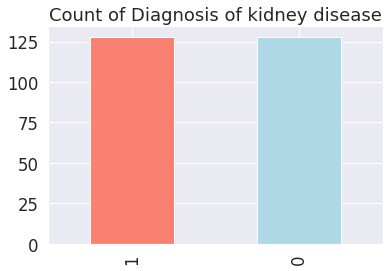

In [ ]:
df['class'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of Diagnosis of kidney disease")

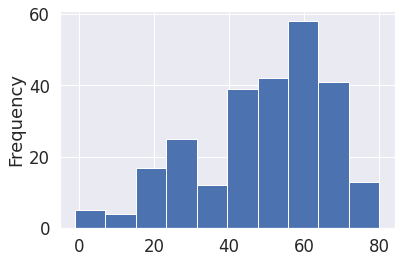

In [ ]:
df['age'].plot(kind='hist')

#Plotting to see null values
Here any features which have not touched the 400 mark at the top are having null values.

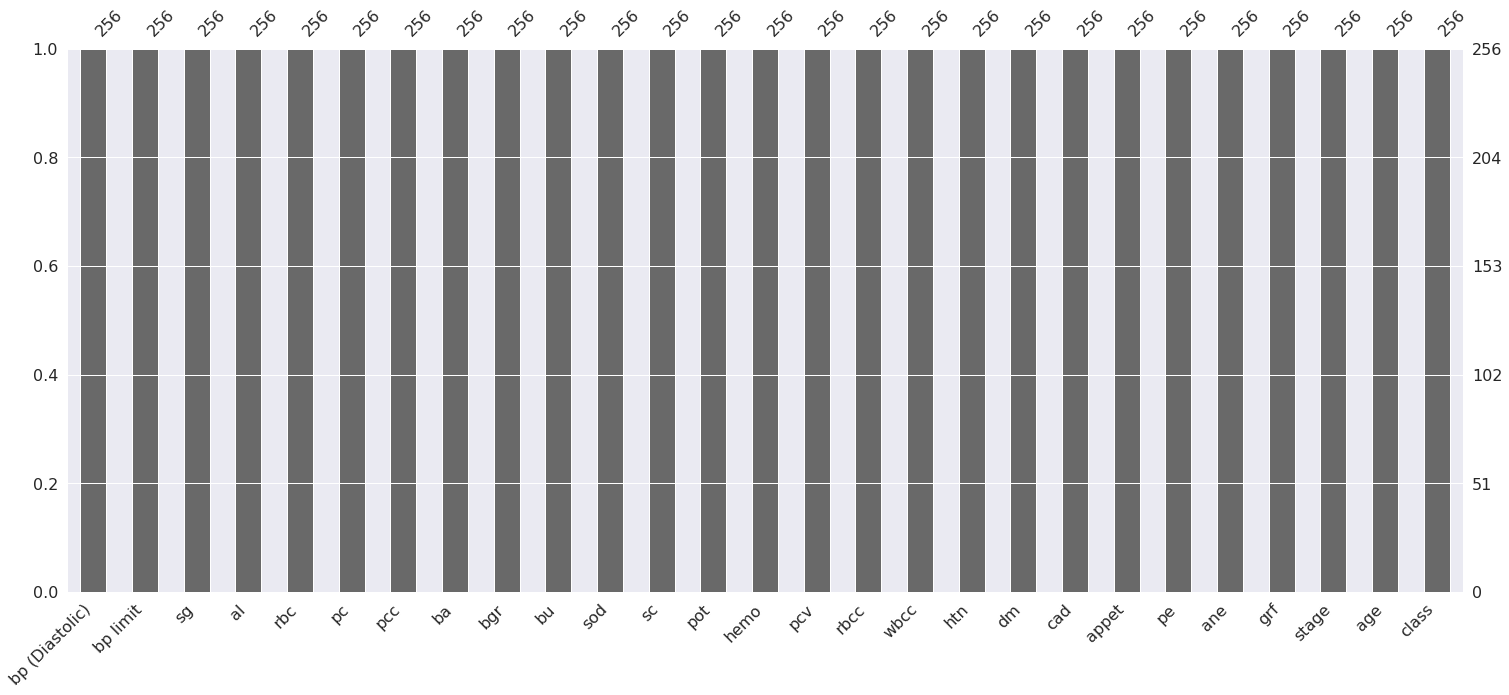

In [ ]:
p = msno.bar(data)

#Outliner
Here in the above graph we can see the distribution of blood pressure and also in the subplot it is visible that the bp column has some outliers in it.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


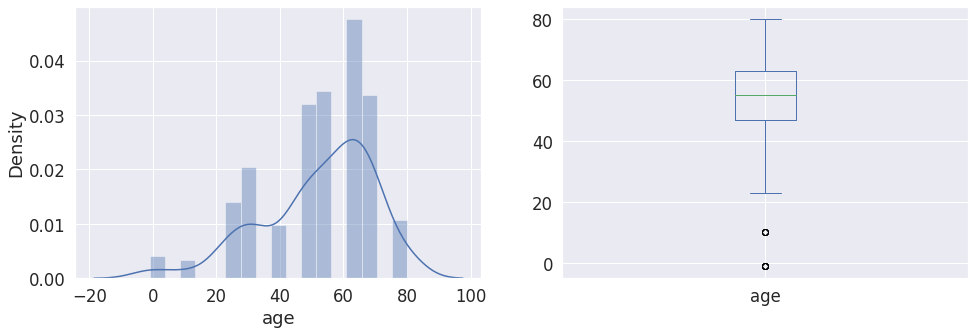

In [ ]:
plt.subplot(121), sns.distplot(data['age'])
plt.subplot(122), data['age'].plot.box(figsize=(16,5))
plt.show()

#Conver (DS) object to values

In [ ]:
"""
#data['class'] = data['class'].map({'ckd':1,'notckd':0})
data['htn'] = data['htn'].map({'yes':1,'no':0})
data['dm'] = data['dm'].map({'yes':1,'no':0})
data['cad'] = data['cad'].map({'yes':1,'no':0})
data['appet'] = data['appet'].map({'good':1,'poor':0})
data['ane'] = data['ane'].map({'yes':1,'no':0})
data['pe'] = data['pe'].map({'yes':1,'no':0})
data['ba'] = data['ba'].map({'present':1,'notpresent':0})
data['pcc'] = data['pcc'].map({'present':1,'notpresent':0})
data['pc'] = data['pc'].map({'abnormal':1,'normal':0})
data['rbc'] = data['rbc'].map({'abnormal':1,'normal':0})"""
data['class'].value_counts()

1    128
0    128
Name: class, dtype: int64

#Calculate Correlation
Finding the Correlation between the plots

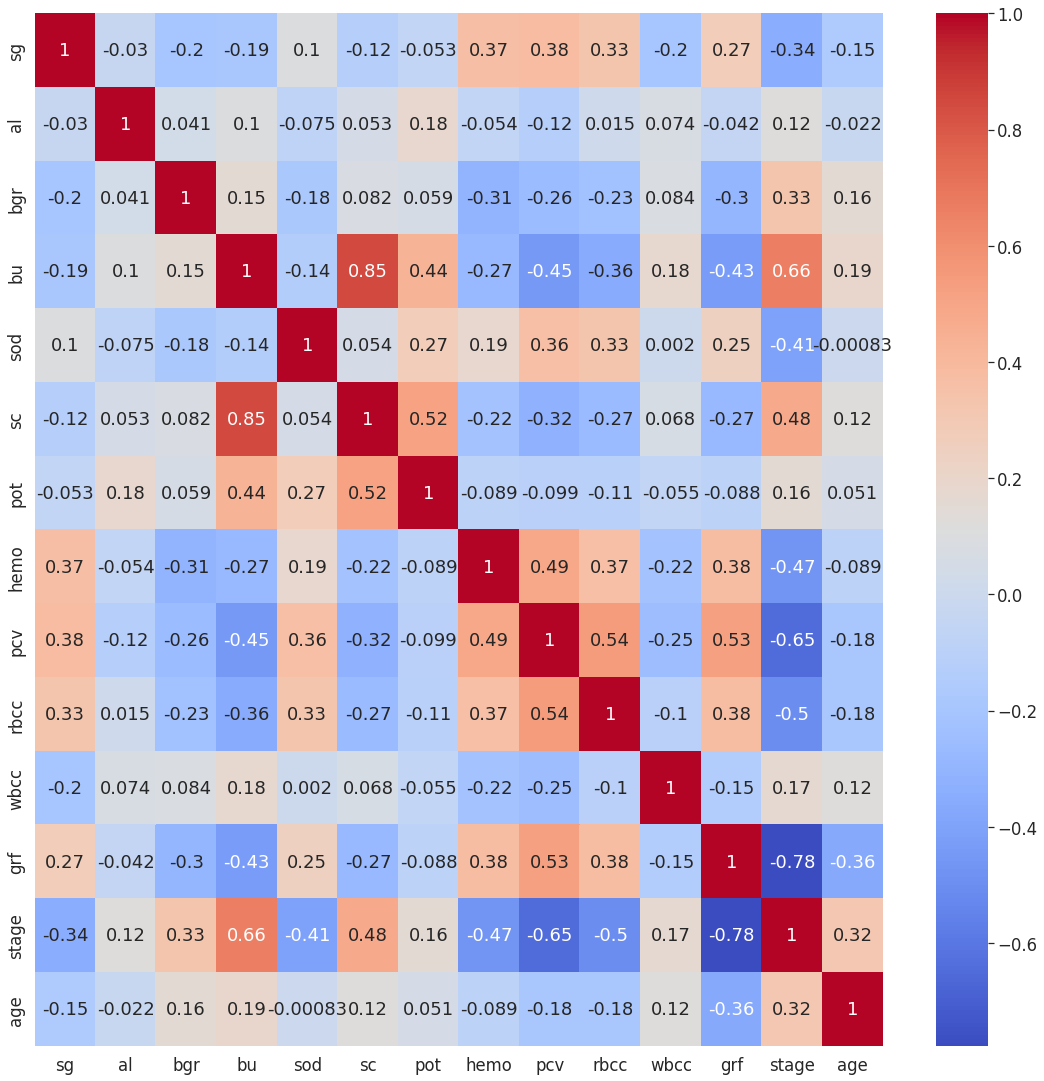

In [ ]:
plt.figure(figsize = (19,19))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm') # looking for strong correlations with "class" row

#Exploratory data analysis (EDA)


In [ ]:
data.shape

(256, 27)

In [ ]:
data.columns

Index(['bp (Diastolic)', 'bp limit', 'sg', 'al', 'rbc', 'pc', 'pcc', 'ba',
       'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc', 'htn',
       'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage', 'age', 'class'],
      dtype='object')

In [ ]:
data.shape[0], data.dropna().shape[0] #we can see that there are 157 null values in the dataset.

(256, 256)

#Fill NaN with the avg value (Save DS)

In [ ]:
df = df.interpolate().bfill()
df = df.round(2)
print (df)
#df.to_csv('/content/drive/MyDrive/Data/Personal Collection DS/Kidney Disease/ckdDS-2 (2021) not null hybrid.csv', index=False)

    bp (Diastolic) bp limit  sg    al rbc pc pcc ba  bgr  bu  ...  htn  dm  \
1                0        0   1  -1.0   0  0   0  0  100  40  ...    0   0   
2                0        0   1   0.0   0  0   0  0  133  40  ...    0   0   
3                0        0   1  10.0   1  1   0  1  100  67  ...    0   0   
4                1        1   1  -1.0   0  0   0  0  133  40  ...    0   0   
5                0        0   1   0.0   0  0   0  0  175  40  ...    0   1   
..             ...      ...  ..   ...  .. ..  .. ..  ...  ..  ...  ...  ..   
252              0        0   1   0.0   0  0   0  0  133  40  ...    0   0   
253              0        0   1   0.0   0  0   0  0  100  40  ...    0   0   
254              1        1   1   0.0   0  0   0  0  100  40  ...    0   0   
255              1        1   2   0.0   0  0   0  0  133  40  ...    0   0   
256              1        1   2   0.0   0  0   0  0  100  40  ...    0   0   

     cad  appet  pe  ane  grf stage   age class  
1      0     

In [ ]:
data = df
data.shape[0], data.dropna().shape[0] #we can see that there are 157 null values in the dataset.

(256, 256)

In [ ]:
data.dropna()
data.shape

(256, 27)

In [ ]:
data["class"].value_counts()

1    128
0    128
Name: class, dtype: int64

#ML models

#Dataset flitering [data|class]

In [ ]:
X = data.iloc[:,:-1]
y = data['class']

#Data plot

In [ ]:
import matplotlib.pyplot as plt

def _plot_data(new_data, data_label):
    print(new_data.shape)
    plt.figure(figsize=(8,6))
    
    plt.scatter(new_data[:,0],new_data[:,1],c=data_label[:]) #For visualization taken 2D only
    # plt.xlabel('First principle component')
    # plt.ylabel('Second principle component')
    

#Feature Selection
[source Scikit](https://scikit-learn.org/stable/modules/feature_selection.html)
[source Kaggle](https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection/notebook)
[source Analytic Vidya](https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/)


In [ ]:
#!pip install skfeature-chappers
st_feat = time.time()
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
#Remove features with low varience
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
# #FS-L1
# logistic = LogisticRegression(C = 1, penalty = "l1", solver = 'liblinear', random_state=7).fit(X,y)
# importance = np.abs(logistic.coef_)[0]
# print(importance)
# model = SelectFromModel(logistic, prefit=True)
# X_new = model.transform(X)
# print(X_new.shape)

# num_feat = 12
# indic_etree = np.argsort(importance)[::-1][:num_feat]
# print("Etree rank Indices:",indic_etree )
# # Getting N maximum values
# print("Etree rank Values sorted:",importance[indic_etree])

# X_etree_form = np.asarray(X)  
# X_etree = X_etree_form[:, indic_etree[:]] 
# print("Etree: ",X_etree.shape)


# #FS-VT
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
dataset_rm_low_var = sel.fit_transform(X)
print(dataset_rm_low_var.shape)
vt = sel.fit(X,y)
importance = np.abs(vt.variances_)
print(importance)

# #L1 
# FS-LSVC- based Feature Selection
# from sklearn.svm import LinearSVC
# from sklearn.feature_selection import SelectFromModel
# lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(X, y)
# model = SelectFromModel(lsvc, prefit=True)
# X_L1 = model.transform(X)
# print(X_L1.shape)

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
# from sklearn.feature_selection import mutual_info_classif

# #FS-f_classif
# X_fclass = SelectKBest(f_classif, k=11).fit_transform(X, y) #K feature with high chi will be selected #Input must be [non negative]
# print("F_Classif: ", X_fclass.shape)

#FS-mutual info
# X_mic = SelectKBest( mutual_info_classif, k=11).fit_transform(X, y)
# print("Mutual_info_classif: ", X_mic.shape)
# select_feature = SelectKBest( mutual_info_classif, k=11).fit(X,y) #Run score function on (X, y) and get the appropriate features.
# mic_scores = select_feature.scores_
# print('Mic Score list:', mic_scores)
# num_feat = 11
# indic_etree = np.argsort(mic_scores)[::-1][:num_feat]
# print("Etree rank Indices:",indic_etree)
# # Getting N maximum values
# print("Etree rank Values sorted:",mic_scores[indic_etree])

# X_etree_form = np.asarray(X)  
# X_etree = X_etree_form[:, indic_etree[:]] 
# print("Etree: ",X_etree.shape)

# #FS-Tree based
# from sklearn.ensemble import ExtraTreesClassifier
# clf_fs = ExtraTreesClassifier(n_estimators=150)
# clf_fs = clf_fs.fit(X, y)
# extra_tree = clf_fs.feature_importances_  
# model = SelectFromModel(clf_fs, prefit=True)
# X_treeFS = model.transform(X)
# X_treeFS.shape  
# print("Tree based FS: ", X_treeFS.shape)   
# # Normalizing the individual importances
# feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
#                                         clf_fs.estimators_], axis = 0)

# num_feat = 10
# indic_etree = np.argsort(feature_importance_normalized)[::-1][:num_feat]
# print("Etree rank Indices:",indic_etree )
# # Getting N maximum values
# print("Etree rank Values sorted:",feature_importance_normalized[indic_etree])

# X_etree_form = np.asarray(X)  
# X_etree = X_etree_form[:, indic_etree[:]] 
# print("Etree: ",X_etree.shape)

#FS-RFE
# from sklearn.svm import SVC
# from sklearn.feature_selection import RFE
# svc = SVC(kernel="linear", C=1)
# rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
# rfe.fit(X, y)
# ranking = rfe.ranking_
# print("RFE rank: ",ranking)

# num_feat = 11
# indic_rfe = np.argsort(ranking)[::-1][:num_feat]
# print("RFE rank Indices:",indic_rfe)
# # Getting N maximum values
# print("RFE rank Values sorted:",ranking[indic_rfe])

# X_rfe_form = np.asarray(X)  
# X_rfe = X_rfe_form[:, indic_rfe[:]] 
# print("RFE: ",X_rfe.shape)

# dataframe1 = pd.DataFrame(X)
# feat_imp1 = pd.Series(ranking, dataframe1.columns[0:len(dataframe1.columns)])
# feat_imp1.plot(kind="barh", color="teal")
# plt.show()

# dataframe2 = pd.DataFrame(X_rfe)
# feat_imp2 = pd.Series(ranking[indic_rfe], dataframe2.columns[0:len(dataframe2.columns)])
# feat_imp2.plot(kind="barh", color="teal")
# plt.show()

# #FS-fisher score
# from skfeature.function.similarity_based import fisher_score
# import pandas as pd

# idx = fisher_score.fisher_score(X.to_numpy(),y.to_numpy(), mode='rank') #returns rank directly instead of fisher score. so no need for feature_ranking
# print(idx)
# num_feat = 9
# indices_fish = np.argsort(idx)[::-1][:num_feat]
# # Getting N maximum values
# print("Fish rank Values sorted:",idx[indices_fish])
# print("Fish rank Indices:",indices_fish)

# X_fish_form = np.asarray(X)  
# X_fish = X_fish_form[:, indices_fish[:]] 
# print("Fish score: ",X_fish.shape)
# dataframe2 = pd.DataFrame(X_fish)
# feat_imp2 = pd.Series(idx[indices_fish], dataframe2.columns[0:len(dataframe2.columns)])
# feat_imp2.plot(kind="barh", color="teal")
# plt.show()

(256, 18)
[2.49618530e-01 5.74218750e-01 2.14782715e-01 5.30235291e+00
 8.81195068e-02 1.44882202e-01 9.43450928e-02 4.11224365e-02
 5.15548022e+03 2.04915074e+03 6.93050385e+01 1.62321777e+01
 1.54296875e+01 4.47249864e+01 1.08318100e+02 1.08091736e+00
 6.33907959e+06 2.11853027e-01 1.98669434e-01 7.85522461e-02
 1.31835938e-01 1.18026733e-01 1.09375000e-01 3.69613062e+03
 2.12890625e+00 3.13601562e+02]


<Figure size 576x576 with 0 Axes>

In [ ]:
print(importance.shape)

(26,)


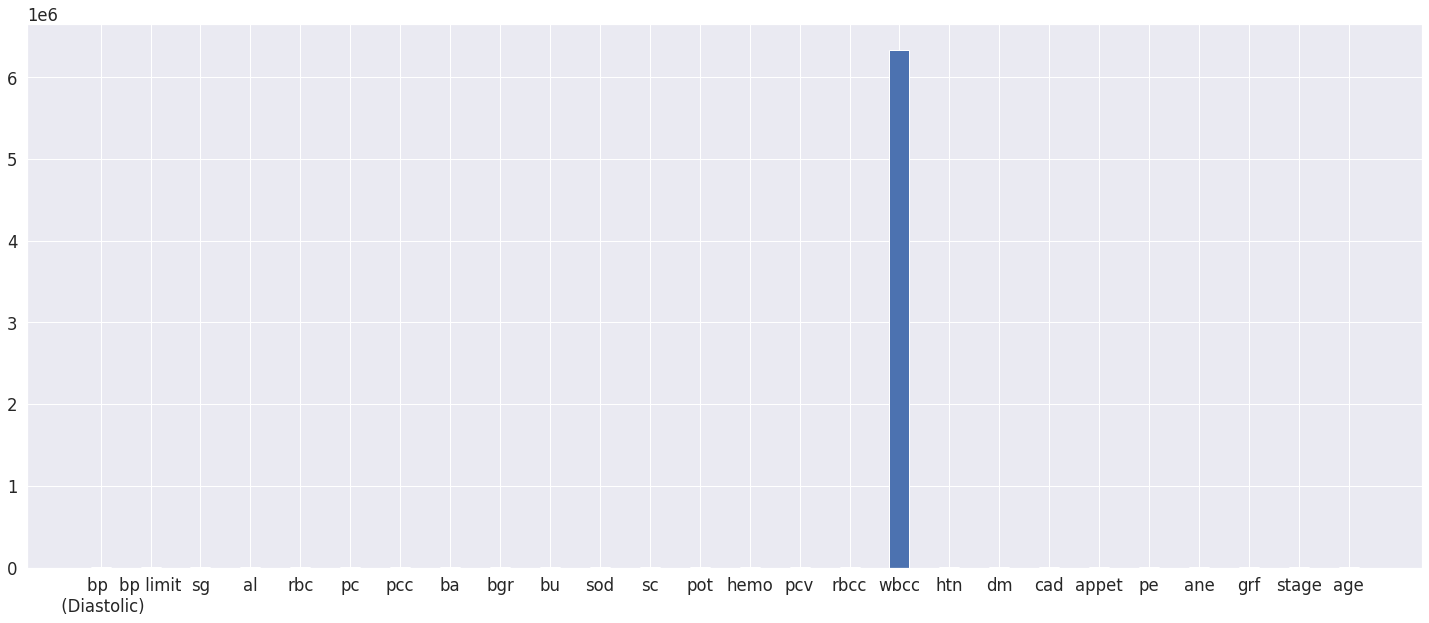

In [ ]:
import matplotlib.pyplot as pyplot
f = pyplot.figure()
f.set_figwidth(25)
f.set_figheight(10)
fim_all = np.array(['bp \n (Diastolic)', 'bp limit', 'sg', 'al', 'rbc', 'pc', 'pcc', 'ba',
'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc', 'htn',
'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage', 'age']) #, 'class'


#MIC parent
#parent
pyplot.bar(fim_all, importance, width=0.4)
pyplot.plot(kind="barh", color="teal")
pyplot.show()

#RFE parent
#parent
# print(type(fim_all), len(fim_all), len(ranking))
# pyplot.bar(fim_all.tolist() , ranking.tolist(), width=0.4)
# pyplot.plot(kind="barh", color="teal")
# pyplot.show()

# print(extra_tree.shape)
#parent
#ETree <class 'numpy.ndarray'> fim_all=26 feature_importance_normalized=26
# print(type(fim_all), len(fim_all), len(feature_importance_normalized))
# pyplot.bar(fim_all.tolist() , feature_importance_normalized.tolist(), width=0.4)
# pyplot.plot(kind="barh", color="teal")
# pyplot.show()
#Eelective
#ETree 
# ranks_list = extra_tree.tolist() #indic_rfe.tolist() #[ 7  6 16 22 19 23 25  9  8 12 14]
# pyplot.bar(fim_all[indic_etree], feature_importance_normalized[indic_etree], width=0.4)
# pyplot.plot(kind="barh", color="teal")
# pyplot.show()

#_plotbox(X_etree.astype('float')) #X_mic.astype('float')

#Feature importance
[ml](https://machinelearningmastery.com/calculate-feature-importance-with-python/)

#Co-efficient (LR)
Recall this is a classification problem with classes 0 and 1. Notice that the coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

No clear pattern of important and unimportant features can be identified from these results.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Feature: 0, Score: 0.00517
Feature: 1, Score: 0.02160
Feature: 2, Score: -0.01757
Feature: 3, Score: -0.00586
Feature: 4, Score: 0.00453
Feature: 5, Score: 0.00747
Feature: 6, Score: 0.00482
Feature: 7, Score: 0.00300
Feature: 8, Score: 0.06710
Feature: 9, Score: 0.05064
Feature: 10, Score: 0.00147
Feature: 11, Score: 0.02169
Feature: 12, Score: 0.00342
Feature: 13, Score: -0.26101
Feature: 14, Score: -0.25067
Feature: 15, Score: -0.04228
Feature: 16, Score: 0.00016
Feature: 17, Score: 0.01687
Feature: 18, Score: 0.01176
Feature: 19, Score: 0.00468
Feature: 20, Score: 0.01233
Feature: 21, Score: 0.00857
Feature: 22, Score: 0.00490
Feature: 23, Score: -0.01160
Feature: 24, Score: 0.02544
Feature: 25, Score: 0.01252


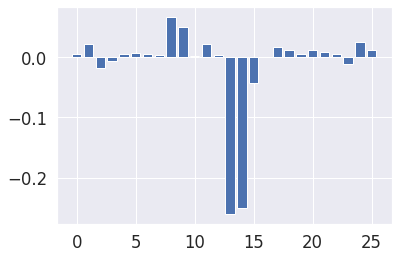

agsort indices imp:  [13 14 15  2 23  3 16 10  7 12  4 19  6 22  0  5 21 18 20 25 17  1 11 24
  9  8]
indices imp:  [13 14 15 24  9  8]
Important score:  (256, 6)


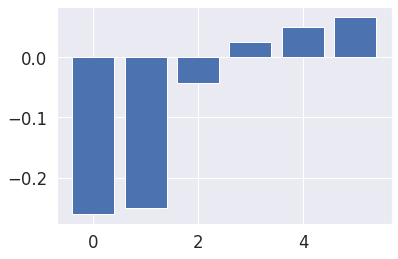

In [ ]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance--------------------------
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

num_feat = 3
indices_imp = np.argsort(importance)
print("agsort indices imp: ",indices_imp)
a = indices_imp[:num_feat]
df_feat1 = df.columns[0:num_feat]
b = indices_imp[len(indices_imp)-num_feat:]
df_feat2 = df.columns[len(indices_imp)-num_feat:]
new_indices_imp = np.concatenate((a, b), axis=0)
print("indices imp: ",new_indices_imp)

X_imp_form = np.asarray(X)  
X_imp_cof = X_imp_form[:, new_indices_imp[:]] #new feature dataset
print("Important score: ",X_imp_cof.shape)
pyplot.bar([x for x in range(len(importance[new_indices_imp]))], importance[new_indices_imp])
pyplot.show()

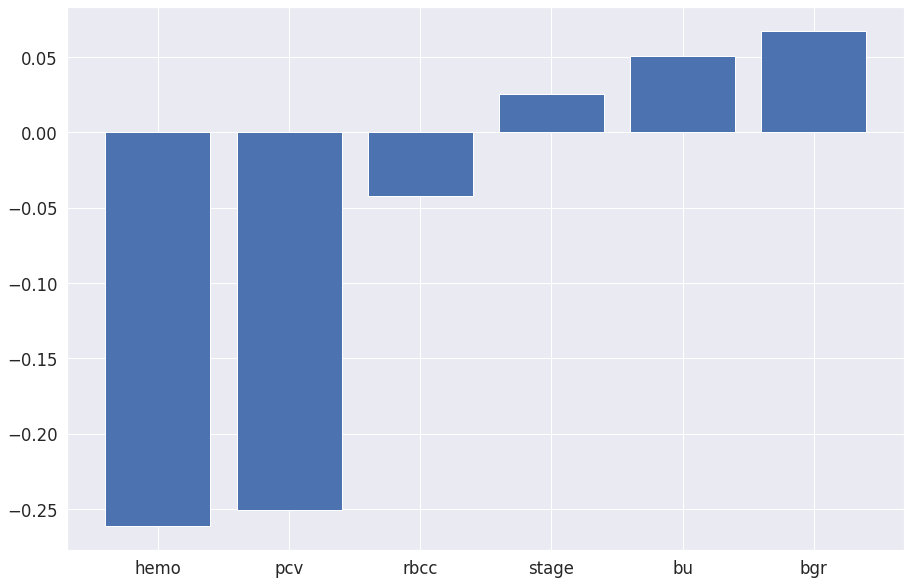

Index(['bp (Diastolic)', 'bp limit', 'sg', 'al', 'rbc', 'pc', 'pcc', 'ba',
       'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc', 'htn',
       'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage', 'age', 'class'],
      dtype='object')


In [ ]:
f = pyplot.figure()
f.set_figwidth(15)
f.set_figheight(10)
tik = ['hemo', 'pcv', 'rbcc', 'stage', 'bu','bgr']
pyplot.bar(tik, importance[new_indices_imp])
pyplot.show()
print(df.columns)

In [ ]:
# print(new_indices_imp.tolist()) #[13, 14, 15, 24, 9, 8]
# df2 = _new_df(indices_imp,new_indices_imp.tolist(), num_feat) #[13 14 15 24  9  8]
# _plot_feature_imp(df2,importance) # importance = frequency all features

# _plot_feature_imp(df,importance)

#Tree based

Feature: 0, Score: 0.003
Feature: 1, Score: 0.024
Feature: 2, Score: 0.019
Feature: 3, Score: 0.048
Feature: 4, Score: 0.008
Feature: 5, Score: 0.005
Feature: 6, Score: 0.000
Feature: 7, Score: 0.001
Feature: 8, Score: 0.034
Feature: 9, Score: 0.009
Feature: 10, Score: 0.024
Feature: 11, Score: 0.000
Feature: 12, Score: 0.000
Feature: 13, Score: 0.221
Feature: 14, Score: 0.200
Feature: 15, Score: 0.082
Feature: 16, Score: 0.004
Feature: 17, Score: 0.039
Feature: 18, Score: 0.044
Feature: 19, Score: 0.000
Feature: 20, Score: 0.008
Feature: 21, Score: 0.004
Feature: 22, Score: 0.001
Feature: 23, Score: 0.103
Feature: 24, Score: 0.104
Feature: 25, Score: 0.015


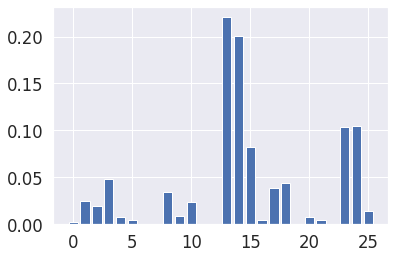

agsort indices imp:  [12 19  6 11 22  7  0 21 16  5  4 20  9 25  2 10  1  8 17 18  3 15 23 24
 14 13]
indices imp:  [13 14 24 23 15  3 18 17  8  1 10]
Important score:  (256, 11)


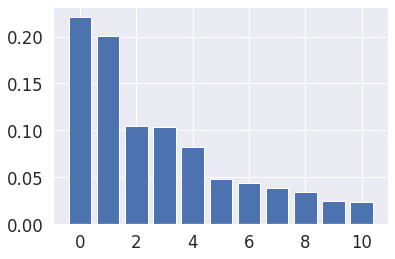

In [ ]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.3f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

num_feat = 11
# indices_imp = np.argsort(importance)[::-1][:num_feat]
# # Getting N maximum values
# print("Important rank Values sorted:",importance[indices_imp])
# print("Important rank Indices:",indices_imp)

# X_imp_form = np.asarray(X)  
# X_imp_tree = X_imp_form[:, indices_imp[:]] 
# print("Important score: ",X_imp_tree.shape)
indices_imp = np.argsort(importance)
print("agsort indices imp: ",indices_imp)
new_indices_imp2 = indices_imp[::-1][:num_feat]
print("indices imp: ",new_indices_imp2)

X_imp_form2 = np.asarray(X)  
X_imp_rf = X_imp_form2[:, new_indices_imp2[:]] #new feature dataset
print("Important score: ",X_imp_rf.shape)

pyplot.bar([x for x in range(len(importance[new_indices_imp2]))], importance[new_indices_imp2])
pyplot.show()

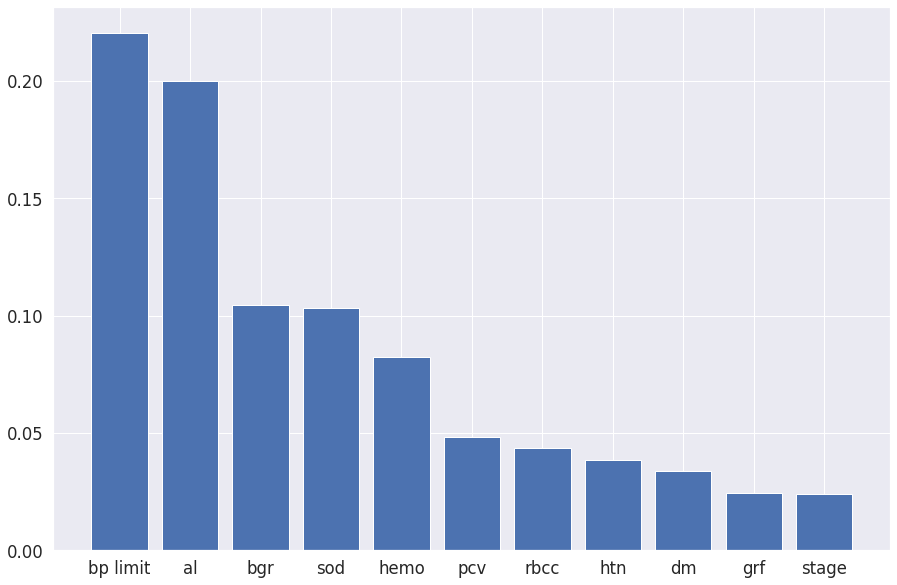

In [ ]:
f = pyplot.figure()
f.set_figwidth(15)
f.set_figheight(10)
tik = ['bp limit', 'al', 'bgr', 'sod', 'hemo', 'pcv', 'rbcc', 'htn', 'dm',
       'grf', 'stage']
pyplot.bar(tik, importance[new_indices_imp2])
pyplot.show()
# _plot_feature_imp(df,importance)

In [ ]:
# print(new_indices_imp2.tolist()) #[13, 14, 24, 23, 15, 3, 18, 17, 8, 1, 10]
# df2 = _new_df(indices_imp,new_indices_imp2.tolist(), num_feat) #[13 14 24 23, 15 3 18 17 8 1 10]
# _plot_feature_imp(df2,importance) # importance = frequency all features
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.3f' % (i,v))
# # print(indices_imp.tolist())
# _plot_feature_imp(df,importance)

#Permutation Feature importance

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00313
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.08281
Feature: 9, Score: 0.03125
Feature: 10, Score: -0.00469
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00313
Feature: 14, Score: 0.00703
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.07812
Feature: 17, Score: 0.00313
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.18828
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.01797


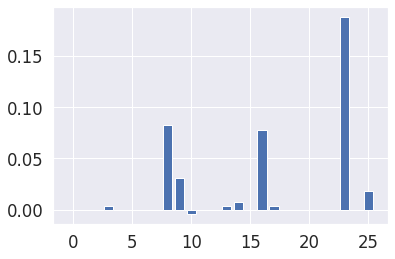

Important rank Values sorted: [0.18828125 0.0828125  0.078125   0.03125    0.01796875]
Important rank Indices: [23  8 16  9 25]
Important score:  (256, 5)


In [ ]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

num_feat = 5
indices_imp = np.argsort(importance)[::-1][:num_feat]
# Getting N maximum values
print("Important rank Values sorted:",importance[indices_imp])
print("Important rank Indices:",indices_imp)

X_imp_form = np.asarray(X)  
X_imp_perm = X_imp_form[:, indices_imp[:]] 
print("Important score: ",X_imp_perm.shape)

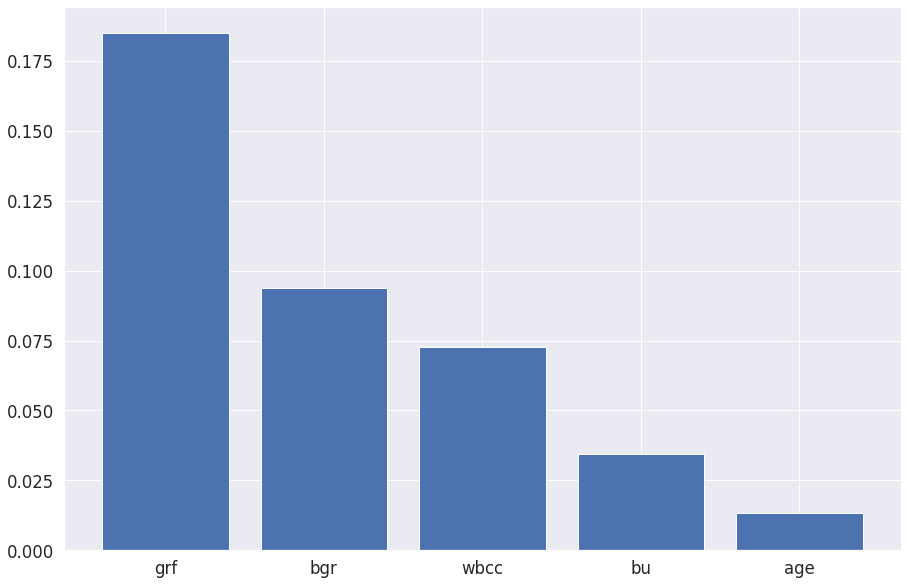

In [ ]:
f = pyplot.figure()
f.set_figwidth(15)
f.set_figheight(10)
rank = [0.18515625, 0.09375,    0.07265625, 0.034375,   0.01328125]
tik = ['grf', 'bgr', 'wbcc', 'bu', 'age']
pyplot.bar(tik, rank)
pyplot.show()
# _plot_feature_imp(df,importance)

In [ ]:
print(importance)

[ 0.          0.          0.          0.003125    0.          0.
  0.          0.          0.0828125   0.03125    -0.0046875   0.
  0.          0.003125    0.00703125  0.          0.078125    0.003125
  0.          0.          0.          0.          0.          0.18828125
  0.          0.01796875]


In [ ]:
print(type(y.to_numpy()[0]))

<class 'str'>


#Feature choose from FIMs

In [ ]:
X = X.to_numpy()

In [ ]:
print(df.columns)
print(df.head(1).to_string())

print(X.shape,' \n',X[0])
# fim_all = ['bp (Diastolic)', 'bp limit', 'sg', 'al', 'rbc', 'pc', 'pcc', 'ba', [0-7]
# 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc', 'htn', [8-17]
# 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage', 'age', 'class'] [18-26]
fim_choose = [23, 8, 16, 9, 25, 2, 3, 10, 13, 14, 15, 17, 24, 18] 
X_imp_form = np.asarray(X)  
X_imp_fims= X_imp_form[:, fim_choose[:]] 
print("Important score: ",X_imp_fims.shape)

Index(['bp (Diastolic)', 'bp limit', 'sg', 'al', 'rbc', 'pc', 'pcc', 'ba',
       'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc', 'htn',
       'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage', 'age', 'class'],
      dtype='object')
  bp (Diastolic) bp limit  sg   al rbc pc pcc ba  bgr  bu  sod  sc  pot  hemo  pcv  rbcc  wbcc htn dm cad appet pe ane  grf  stage   age class
1              0        0   1 -1.0   0  0   0  0  100  40  140   1    1  -1.0   35     4  8550   0  0   0     0  0   0  230      1  10.0     1
(256, 26)  
 ['0' '0' 1 -1.0 '0' '0' '0' '0' 100 40 140 1 1 -1.0 35 4 8550 '0' '0' '0'
 '0' '0' '0' 230 1 10.0]
Important score:  (256, 14)


#Outlier detection
[Github](https://github.com/codebasics/py/blob/master/ML/FeatureEngineering/2_outliers_z_score/2_outliers_z_score.ipynb)
[Box plot](https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/)
[Box plot-2](https://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/)
[Remove outliers](https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/)

In [ ]:
def _plotbox(boxData):
    fig = plt.figure(figsize =(10, 7))
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.boxplot(boxData)
    plt.show()

#Feature selection | importance assign

In [ ]:
# X = X_imp_fims #X_imp_rf #X_imp_perm #X_imp_rf #X_imp_cof#X_imp #X_rfe #X_mic#dataset_rm_low_var #X_new #dataset_rm_low_var #X_L1 # X_treeFS 
# _plotbox(X.astype('float')) #X_mic.astype('float')
# _plot_data(X, y)

#Remove outlier
How to use an outlier detection model to identify and remove rows from a training dataset in order to lift predictive modeling performance.
[remove outlier](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)
[From iris dataset](https://www.datasciencelearner.com/handle-outliers-multivariate-outlier-detection/)

In [ ]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Data observations: %d' % len(data))
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=46.685, 75th=53.359, IQR=6.674
Identified outliers: 81
Data observations: 10000
Non-outlier observations: 9919


In [ ]:
print(X.shape)

(256, 26)


#Dimension Reduction (PCA|SVD)

#PCA

(256, 7)


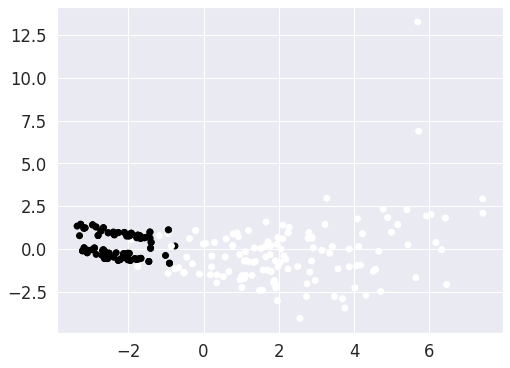

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data=scaler.transform(X) #making input arrays -> Tranpose 

from sklearn.decomposition import PCA
pca = PCA(n_components = 7) #Here code suggests 3|10 is the best 5 classifiers shows 100% accuracy
pca.fit(scaled_data)
X_pca=pca.transform(scaled_data) #making input arrays -> reverse Tranpose = original
_plot_data(X_pca, y)

#SVD

(256, 26)
(256, 7)


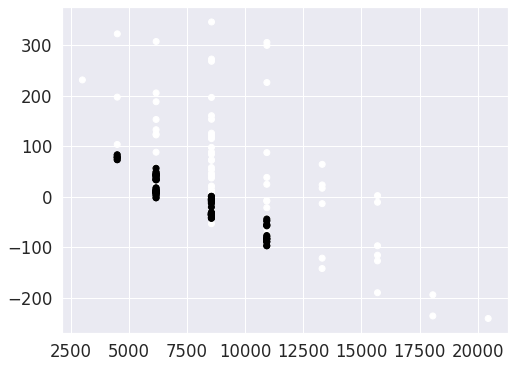

In [ ]:
from numpy import array
from sklearn.decomposition import TruncatedSVD
# svd
svd = TruncatedSVD(n_components=7)
svd.fit(X)
X_svd = svd.transform(X)
print(X.shape)
_plot_data(X_svd,y)

#Data set Rebuilding using PCA|SVD

In [ ]:
# X = np.round_(X_pca, decimals = 3) # with PCA
# print(X.shape)
# _plotbox(X.astype('float')) #X_mic.astype('float')

#Dataset Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify = y, shuffle = True, random_state=2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(179, 26)
(77, 26)
(179,)
(77,)


#Save the ML model <lib, joblib>

```
from sklearn.tree import DecisionTreeClassifier
import joblib
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
#Save the model to your Google Drive
joblib.dump(clf, '/content/drive/MyDrive/decision_tree_model.pkl')

```



```
# Load the saved model
clf = joblib.load('decision_tree_model.pkl')
```






#ML-Logestic Regrasion

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
res = logreg.score(X_train,y_train)
print(res*100,'%')

95.53072625698324 %


In [ ]:
res = logreg.score(X_test,y_test)
print(res*100,'%')

94.8051948051948 %


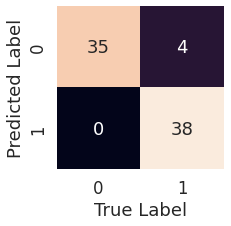

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    """
    This function will be heloing in plotting the confusion matrix by using seaborn
    """
    
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

log_pred = logreg.predict(X_test)
plot_conf_mat(y_test, log_pred)

#print('Train Accuracy: ', accuracy_score(X_train, y_train))
#print('Test Accuracy: ', accuracy_score(X_test, y_test))

#Calculate Time

In [ ]:
end_time = time.time()
runtime = end_time - start_time
print("Total program run time: ", runtime)

Total program run time:  15.733540058135986


#Logistic Regression-2

LG Train Accuracy: 95.53%
LG Test Accuracy: 94.81%
Kappa score:0.900


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


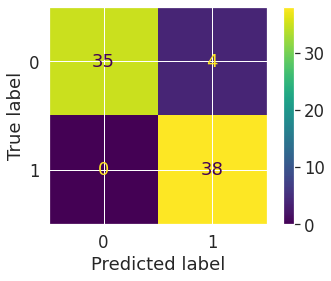

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Accuracy = logreg.score(X_test, y_test)
print(f'LG Train Accuracy: {round(logreg.score(X_train,y_train)*100,2)}%')
print(f'LG Test Accuracy: {round(Accuracy*100,2)}%')

predictions = logreg.predict(X_test)
kp_lr = round(cohen_kappa_score(y_test, predictions),2)
print('Kappa score:%.3f' %(kp_lr))
cm = confusion_matrix(y_test, predictions, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sensitivity = round(tp / (tp + fn),2)
specificity = round(tn / (tn + fp),2)
PPV = round(tp / (tp + fp),2)
NPV = round(tn / (tn + fn),2)
F1 = round(2*((PPV * sensitivity) / (PPV + sensitivity)),2)
Train_accuracy = round(logreg.score(X_train,y_train)*100,2)
Accuracy = round(Accuracy*100,2)
result_LR = []
result_LR.append("LR")
result_LR.append(sensitivity)
result_LR.append(specificity)
result_LR.append(PPV)
result_LR.append(NPV)
result_LR.append(F1)
result_LR.append(Train_accuracy)
result_LR.append(Accuracy)
result_LR.append(kp_lr)
print("sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7), kappa: \n",result_LR)

sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7), kappa: 
 ['LR', 1.0, 0.9, 0.9, 1.0, 0.95, 95.53, 94.81, 0.9]


#Naive Bayes

NB Train Accuracy: 93.3%
NB Accuracy: 94.81%
Kappa score:0.900


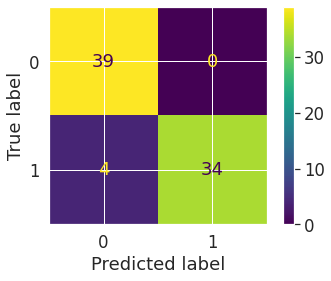

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

p = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])
p.fit(X_train,y_train) 
NB = p
NB.fit(X_train, y_train)
Accuracy = NB.score(X_test, y_test)
Train_accuracy = round(NB.score(X_train,y_train)*100,2)
print(f'NB Train Accuracy: {Train_accuracy}%')
print(f'NB Accuracy: {round(Accuracy*100,2)}%')

predictions = NB.predict(X_test)
kp_nb = round(cohen_kappa_score(y_test, predictions),2)
print('Kappa score:%.3f' %(kp_nb))
cm = confusion_matrix(y_test, predictions, labels=NB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=NB.classes_)
disp.plot()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sensitivity = round(tp / (tp + fn),2)
specificity = round(tn / (tn + fp),2)
PPV = round(tp / (tp + fp),2)
NPV = round(tn / (tn + fn),2)
F1 = round(2*((PPV * sensitivity) / (PPV + sensitivity)),2)
Train_accuracy = round(NB.score(X_train,y_train)*100,2)
Accuracy = round(Accuracy*100,2)
result_NB = []
result_NB.append("NB")
result_NB.append(sensitivity)
result_NB.append(specificity)
result_NB.append(PPV)
result_NB.append(NPV)
result_NB.append(F1)
result_NB.append(Train_accuracy)
result_NB.append(Accuracy)
result_NB.append(kp_nb)
print("sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu, kappa (7): \n",result_NB)

sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu, kappa (7): 
 ['NB', 0.89, 1.0, 1.0, 0.91, 0.94, 93.3, 94.81, 0.9]


#Decision Tree

DT Train Accuracy: 100.0%
DT Accuracy: 97.4%
Kappa score:0.950


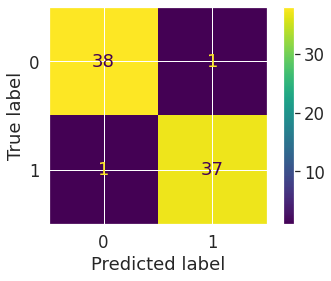

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

DTc = DecisionTreeClassifier()
DTc.fit(X_train, y_train)
Accuracy = DTc.score(X_test, y_test)

print(f'DT Train Accuracy: {round(DTc.score(X_train,y_train)*100,2)}%')
print(f'DT Accuracy: {round(Accuracy*100,2)}%')

predictions = DTc.predict(X_test)
kp_dt = round(cohen_kappa_score(y_test, predictions),2)
print('Kappa score:%.3f' %(kp_dt))
cm = confusion_matrix(y_test, predictions, labels=DTc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DTc.classes_)
disp.plot()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sensitivity = round(tp / (tp + fn),2)
specificity = round(tn / (tn + fp),2)
PPV = round(tp / (tp + fp),2)
NPV = round(tn / (tn + fn),2)
F1 = round(2*((PPV * sensitivity) / (PPV + sensitivity)),2)
Train_accuracy = round(DTc.score(X_train,y_train)*100,2)
Accuracy = round(Accuracy*100,2)
result_DT = []
result_DT.append("DT")
result_DT.append(sensitivity)
result_DT.append(specificity)
result_DT.append(PPV)
result_DT.append(NPV)
result_DT.append(F1)
result_DT.append(Train_accuracy)
result_DT.append(Accuracy)
result_DT.append(kp_dt)
print("sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu, kappa (7): \n",result_DT)

sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu, kappa (7): 
 ['DT', 0.97, 0.97, 0.97, 0.97, 0.97, 100.0, 97.4, 0.95]


#Random Forest

RF Train Accuracy: 100.0%
Random Forest Accuracy: 98.7%
Kappa score:0.970


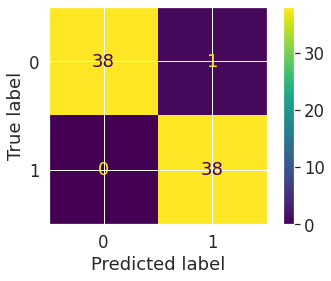

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf_rf = RandomForestClassifier(criterion= 'gini', max_depth=10, max_leaf_nodes=10, random_state=15, verbose= 0)
clf_rf.fit(X_train, y_train)
Accuracy = clf_rf.score(X_test, y_test)

print(f'RF Train Accuracy: {round(clf_rf.score(X_train,y_train)*100,2)}%')
print(f'Random Forest Accuracy: {round(Accuracy*100,2)}%')

predictions = clf_rf.predict(X_test)
kp_rf = round(cohen_kappa_score(y_test, predictions),2)
print('Kappa score:%.3f' %(kp_rf))
cm = confusion_matrix(y_test, predictions, labels=clf_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_rf.classes_)
disp.plot()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sensitivity = round(tp / (tp + fn),2)
specificity = round(tn / (tn + fp),2)
PPV = round(tp / (tp + fp),2)
NPV = round(tn / (tn + fn),2)
F1 = round(2*((PPV * sensitivity) / (PPV + sensitivity)),2)
Train_accuracy = round(clf_rf.score(X_train,y_train)*100,2)
Accuracy = round(Accuracy*100,2)
result_RF = []
result_RF.append("RF")
result_RF.append(sensitivity)
result_RF.append(specificity)
result_RF.append(PPV)
result_RF.append(NPV)
result_RF.append(F1)
result_RF.append(Train_accuracy)
result_RF.append(Accuracy)
result_RF.append(kp_rf)
print("sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu, kappa (7): \n",result_RF)

sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu, kappa (7): 
 ['RF', 1.0, 0.97, 0.97, 1.0, 0.98, 100.0, 98.7, 0.97]


#Passive Aggresive Classifier

PAC Train Accuracy: 50.28%
PAC Accuracy: 49.35%
Kappa score:0.000


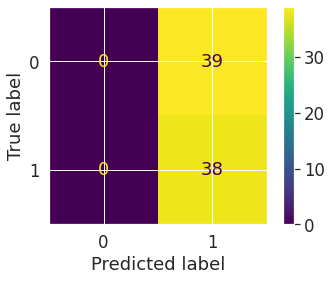

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(X_train,y_train)
#Predict on the test set and calculate accuracy
y_pred=pac.predict(X_test)
Accuracy=accuracy_score(y_test,y_pred)

print(f'PAC Train Accuracy: {round(pac.score(X_train,y_train)*100,2)}%')
print(f'PAC Accuracy: {round(Accuracy*100,2)}%')

predictions = pac.predict(X_test)
kp_pac = round(cohen_kappa_score(y_test, predictions),2)
print('Kappa score:%.3f' %(kp_pac))
cm = confusion_matrix(y_test, predictions, labels=pac.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pac.classes_)
disp.plot()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sensitivity = round(tp / (tp + fn),2)
specificity = round(tn / (tn + fp),2)
PPV = round(tp / (tp + fp),2)
NPV = round(tn / (tn + fn),2)
F1 = round(2*((PPV * sensitivity) / (PPV + sensitivity)),2)
Train_accuracy = round(pac.score(X_train,y_train)*100,2)
Accuracy = round(Accuracy*100,2)
result_PAC = []
result_PAC.append("PAC")
result_PAC.append(sensitivity)
result_PAC.append(specificity)
result_PAC.append(PPV)
result_PAC.append(NPV)
result_PAC.append(F1)
result_PAC.append(Train_accuracy)
result_PAC.append(Accuracy)
result_PAC.append(kp_pac)
print("sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu, kappa (7): \n",result_PAC)

sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu, kappa (7): 
 ['PAC', 1.0, 0.0, 0.49, nan, 0.66, 50.28, 49.35, 0.0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


#SVM

SVM Train Accuracy: 61.45%
SVM Accuracy: 57.14%
Kappa score:0.150


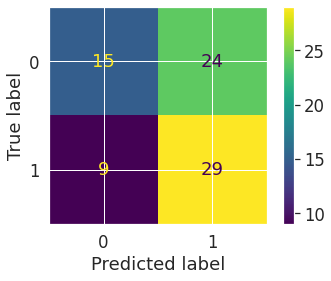

In [ ]:
#cross validation test [svm]
from sklearn import svm
clf_svm = svm.SVC(kernel='rbf', C=1)
clf_svm.fit(X_train,y_train)
#Predict on the test set and calculate accuracy
y_pred=clf_svm.predict(X_test)
Accuracy=accuracy_score(y_test,y_pred)

print(f'SVM Train Accuracy: {round(clf_svm.score(X_train,y_train)*100,2)}%')
print(f'SVM Accuracy: {round(Accuracy*100,2)}%')

predictions = clf_svm.predict(X_test)
kp_svm = round(cohen_kappa_score(y_test, predictions),2)
print('Kappa score:%.3f' %(kp_svm))
cm = confusion_matrix(y_test, predictions, labels=clf_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_svm.classes_)
disp.plot()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sensitivity = round(tp / (tp + fn),2)
specificity = round(tn / (tn + fp),2)
PPV = round(tp / (tp + fp),2)
NPV = round(tn / (tn + fn),2)
F1 = round(2*((PPV * sensitivity) / (PPV + sensitivity)),2)
Train_accuracy = round(clf_svm.score(X_train,y_train)*100,2)
Accuracy = round(Accuracy*100,2)
result_SVM = []
result_SVM.append("SVM")
result_SVM.append(sensitivity)
result_SVM.append(specificity)
result_SVM.append(PPV)
result_SVM.append(NPV)
result_SVM.append(F1)
result_SVM.append(Train_accuracy)
result_SVM.append(Accuracy)
result_SVM.append(kp_svm)
print("sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu, kappa (7): \n",result_SVM)

sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu, kappa (7): 
 ['SVM', 0.76, 0.38, 0.55, 0.62, 0.64, 61.45, 57.14, 0.15]


#KNN

KNN Train Accuracy: 86.59%
KNN Accuracy: 85.71%
Kappa score:0.710


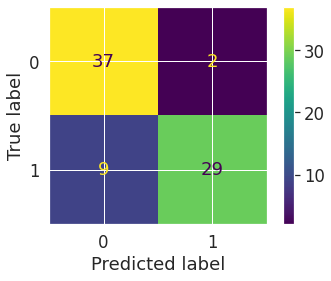

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=7)

clf_knn.fit(X_train,y_train)
#Predict on the test set and calculate accuracy
y_pred=clf_knn.predict(X_test)
Accuracy=accuracy_score(y_test,y_pred)

print(f'KNN Train Accuracy: {round(clf_knn.score(X_train,y_train)*100,2)}%')
print(f'KNN Accuracy: {round(Accuracy*100,2)}%')

predictions = clf_knn.predict(X_test)
kp_knn = round(cohen_kappa_score(y_test, predictions),2)
print('Kappa score:%.3f' %(kp_knn))
cm = confusion_matrix(y_test, predictions, labels=clf_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_knn.classes_)
disp.plot()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sensitivity = round(tp / (tp + fn),2)
specificity = round(tn / (tn + fp),2)
PPV = round(tp / (tp + fp),2)
NPV = round(tn / (tn + fn),2)
F1 = round(2*((PPV * sensitivity) / (PPV + sensitivity)),2)
Train_accuracy = round(clf_knn.score(X_train,y_train)*100,2)
Accuracy = round(Accuracy*100,2)
print(Accuracy)
result_KNN = []
result_KNN.append("KNN")
result_KNN.append(sensitivity)
result_KNN.append(specificity)
result_KNN.append(PPV)
result_KNN.append(NPV)
result_KNN.append(F1)
result_KNN.append(Train_accuracy)
result_KNN.append(Accuracy)
result_KNN.append(kp_knn)
print("sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu, kappa (7): \n",result_KNN)

85.71
sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu, kappa (7): 
 ['KNN', 0.76, 0.95, 0.94, 0.8, 0.84, 86.59, 85.71, 0.71]


#Stochastic Gradient Discent

SGD Train Accuracy: 50.28%
SGD Accuracy: 49.35%
Kappa score:0.000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


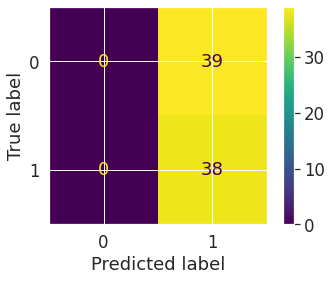

In [ ]:
#Stochastic Gradient Discent
from sklearn.linear_model import SGDClassifier
clf_sgd = SGDClassifier(loss="hinge", penalty="l1", max_iter=5)

clf_sgd.fit(X_train,y_train)
#Predict on the test set and calculate accuracy
y_pred=clf_sgd.predict(X_test)
Accuracy=accuracy_score(y_test,y_pred)

print(f'SGD Train Accuracy: {round(clf_sgd.score(X_train,y_train)*100,2)}%')
print(f'SGD Accuracy: {round(Accuracy*100,2)}%')

predictions = clf_sgd.predict(X_test)
kp_sgd = round(cohen_kappa_score(y_test, predictions),2)
print('Kappa score:%.3f' % (kp_sgd))
cm = confusion_matrix(y_test, predictions, labels=clf_sgd.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_sgd.classes_)
disp.plot()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sensitivity = round(tp / (tp + fn),2)
specificity = round(tn / (tn + fp),2)
PPV = round(tp / (tp + fp),2)
NPV = round(tn / (tn + fn),2)
F1 = round(2*((PPV * sensitivity) / (PPV + sensitivity)),2)
Train_accuracy = round(clf_sgd.score(X_train,y_train)*100,2)
Accuracy = round(Accuracy*100,2)
result_SGD = []
result_SGD.append("SGD")
result_SGD.append(sensitivity)
result_SGD.append(specificity)
result_SGD.append(PPV)
result_SGD.append(NPV)
result_SGD.append(F1)
result_SGD.append(Train_accuracy)
result_SGD.append(Accuracy)
result_SGD.append(kp_sgd)
print("sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu, kappa (7): \n",result_SGD)

sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu, kappa (7): 
 ['SGD', 1.0, 0.0, 0.49, nan, 0.66, 50.28, 49.35, 0.0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


#Gradient Boosting

GB Train Accuracy: 98.88%
GB Accuracy: 96.1%
Kappa score:0.920


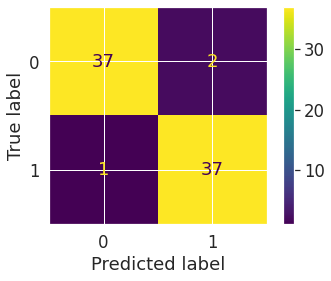

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
clf_gb = GradientBoostingClassifier(learning_rate=0.001,random_state=0)


clf_gb.fit(X_train,y_train)
#Predict on the test set and calculate accuracy
y_pred=clf_gb.predict(X_test)
Accuracy=accuracy_score(y_test,y_pred)

print(f'GB Train Accuracy: {round(clf_gb.score(X_train,y_train)*100,2)}%')
print(f'GB Accuracy: {round(Accuracy*100,2)}%')

predictions = clf_gb.predict(X_test)
kp_gb = round(cohen_kappa_score(y_test, predictions),2)
print('Kappa score:%.3f' %(kp_gb))
cm = confusion_matrix(y_test, predictions, labels=clf_gb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_gb.classes_)
disp.plot()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sensitivity = round(tp / (tp + fn),2)
specificity = round(tn / (tn + fp),2)
PPV = round(tp / (tp + fp),2)
NPV = round(tn / (tn + fn),2)
F1 = round(2*((PPV * sensitivity) / (PPV + sensitivity)),2)
Train_accuracy = round(clf_gb.score(X_train,y_train)*100,2)
Accuracy = round(Accuracy*100,2)
result_GB = []
result_GB.append("GB")
result_GB.append(sensitivity)
result_GB.append(specificity)
result_GB.append(PPV)
result_GB.append(NPV)
result_GB.append(F1)
result_GB.append(Train_accuracy)
result_GB.append(Accuracy)
result_GB.append(kp_gb)
print("sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu, kappa (7): \n",result_GB)

sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu, kappa (7): 
 ['GB', 0.97, 0.95, 0.95, 0.97, 0.96, 98.88, 96.1, 0.92]


#ADA Boost 
XBoost is better than ADA boost

GB Train Accuracy: 100.0%
GB Accuracy: 98.7%
Kappa score:0.970


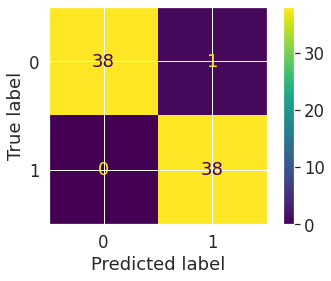

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf_adaB = AdaBoostClassifier(n_estimators=50, random_state=0)
clf_adaB.fit(X_train,y_train)
AdaBoostClassifier(n_estimators=50, random_state=10) #At which boosting is terminated
y_pred = clf_adaB.predict(X_test)
#clf_adaB.score(X, y)
Accuracy=accuracy_score(y_test,y_pred)
print(f'GB Train Accuracy: {round(clf_adaB.score(X_train,y_train)*100,2)}%')
print(f'GB Accuracy: {round(Accuracy*100,2)}%')

predictions = clf_adaB.predict(X_test)
kp_adab = round(cohen_kappa_score(y_test, predictions),2)
print('Kappa score:%.3f' %(kp_adab))
cm = confusion_matrix(y_test, predictions, labels=clf_adaB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_adaB.classes_)
disp.plot()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sensitivity = round(tp / (tp + fn),2)
specificity = round(tn / (tn + fp),2)
PPV = round(tp / (tp + fp),2)
NPV = round(tn / (tn + fn),2)
F1 = round(2*((PPV * sensitivity) / (PPV + sensitivity)),2)
Train_accuracy = round(clf_adaB.score(X_train,y_train)*100,2)
Accuracy = round(Accuracy*100,2)
result_ADAB = []
result_ADAB.append("ADAB")
result_ADAB.append(sensitivity)
result_ADAB.append(specificity)
result_ADAB.append(PPV)
result_ADAB.append(NPV)
result_ADAB.append(F1)
result_ADAB.append(Train_accuracy)
result_ADAB.append(Accuracy)
result_ADAB.append(kp_adab)
print("sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu, kappa (7): \n",result_ADAB)

sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu, kappa (7): 
 ['ADAB', 1.0, 0.97, 0.97, 1.0, 0.98, 100.0, 98.7, 0.97]


#XGBoost
[Help](https://machinelearningmastery.com/extreme-gradient-boosting-ensemble-in-python/)

XBoost Train Accuracy: 100.0%
XBoost Accuracy: 98.7%
Kappa score:0.970


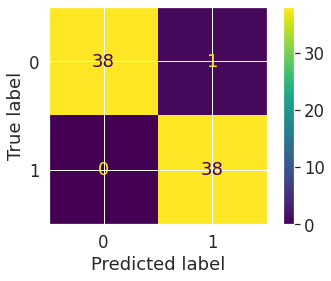

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

clf_xboost = XGBClassifier()
# evaluate the model
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores = cross_val_score(clf_xboost, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
clf_xboost.fit(X_train, y_train)
y_pred = clf_xboost.predict(X_test)
# report performance
Accuracy = accuracy_score(y_test,y_pred)
print(f'XBoost Train Accuracy: {round(clf_xboost.score(X_train,y_train)*100,2)}%')
print(f'XBoost Accuracy: {round(Accuracy*100,2)}%')

predictions = clf_xboost.predict(X_test)
kp_xboost = round(cohen_kappa_score(y_test, predictions),2)
print('Kappa score:%.3f' %(kp_xboost))
cm = confusion_matrix(y_test, predictions, labels=clf_xboost.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_xboost.classes_)
disp.plot()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sensitivity = round(tp / (tp + fn),2)
specificity = round(tn / (tn + fp),2)
PPV = round(tp / (tp + fp),2)
NPV = round(tn / (tn + fn),2)
F1 = round(2*((PPV * sensitivity) / (PPV + sensitivity)),2)
Train_accuracy = round(clf_xboost.score(X_train,y_train)*100,2)
Accuracy_XBOOST = round(Accuracy*100,2)
result_XBOOST = []
result_XBOOST.append("XBOOST")
result_XBOOST.append(sensitivity)
result_XBOOST.append(specificity)
result_XBOOST.append(PPV)
result_XBOOST.append(NPV)
result_XBOOST.append(F1)
result_XBOOST.append(Train_accuracy)
result_XBOOST.append(Accuracy_XBOOST)
result_XBOOST.append(kp_xboost)
print("sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7), kappa: \n",result_XBOOST)

sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7), kappa: 
 ['XBOOST', 1.0, 0.97, 0.97, 1.0, 0.98, 100.0, 98.7, 0.97]


#MLP

MLP Train Accuracy: 50.28%
MLP Accuracy: 49.35%
Kappa score:0.000


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


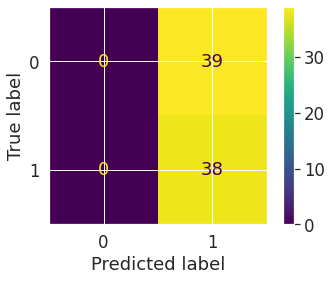

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(52,102), random_state=2)
clf_mlp.fit(X_train, y_train)
y_pred = clf_mlp.predict(X_test)

Accuracy=accuracy_score(y_test,y_pred)
print(f'MLP Train Accuracy: {round(clf_mlp.score(X_train,y_train)*100,2)}%')
print(f'MLP Accuracy: {round(Accuracy*100,2)}%')

predictions = clf_mlp.predict(X_test)
kp_mlp = round(cohen_kappa_score(y_test, predictions),2)
print('Kappa score:%.3f' %(kp_mlp))
cm = confusion_matrix(y_test, predictions, labels=clf_mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_mlp.classes_)
disp.plot()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sensitivity = round(tp / (tp + fn),2)
specificity = round(tn / (tn + fp),2)
PPV = round(tp / (tp + fp),2)
NPV = round(tn / (tn + fn),2)
F1 = round(2*((PPV * sensitivity) / (PPV + sensitivity)),2)
Train_accuracy = round(clf_mlp.score(X_train,y_train)*100,2)
Accuracy = round(Accuracy*100,2)
result_MLP = []
result_MLP.append("MLP")
result_MLP.append(sensitivity)
result_MLP.append(specificity)
result_MLP.append(PPV)
result_MLP.append(NPV)
result_MLP.append(F1)
result_MLP.append(Train_accuracy)
result_MLP.append(Accuracy)
result_MLP.append(kp_mlp)
print("sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7), kappa: \n",result_MLP)

sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7), kappa: 
 ['MLP', 1.0, 0.0, 0.49, nan, 0.66, 50.28, 49.35, 0.0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


#ELM classifier
[Theory medium](https://towardsdatascience.com/introduction-to-extreme-learning-machines-c020020ff82b)
[Kaggele Example](https://www.kaggle.com/code/robertbm/extreme-learning-machine-example/notebook)
[Official docs](https://elm.readthedocs.io/en/latest/usage.html)
[Manual Code](https://medium.datadriveninvestor.com/extreme-learning-machine-for-simple-classification-e776ad797a3c)

In [ ]:
# -*- coding: utf-8 -*-
__author__ = 'fabiansyahcahyo'

import numpy as np

class ELM(object):  
    
    def __init__(self, inputSize, outputSize, hiddenSize):
        """
        Initialize weight and bias between input layer and hidden layer
        Parameters:
        inputSize: int
            The number of input layer dimensions or features in the training data
        outputSize: int
            The number of output layer dimensions
        hiddenSize: int
            The number of hidden layer dimensions        
        """    

        self.inputSize = inputSize
        self.outputSize = outputSize
        self.hiddenSize = hiddenSize       
        
        # Initialize random weight with range [-0.5, 0.5]
        self.weight = np.matrix(np.random.uniform(-0.5, 0.5, (self.hiddenSize, self.inputSize)))

        # Initialize random bias with range [0, 1]
        self.bias = np.matrix(np.random.uniform(0, 1, (1, self.hiddenSize)))
        
        self.H = 0
        self.beta = 0

    def sigmoid(self, x):
        """
        Sigmoid activation function
        
        Parameters:
        x: array-like or matrix
            The value that the activation output will look for
        Returns:      
            The results of activation using sigmoid function
        """
        return 1 / (1 + np.exp(-1 * x))

    def predict(self, X):
        """
        Predict the results of the training process using test data
        Parameters:
        X: array-like or matrix
            Test data that will be used to determine output using ELM
        Returns:
            Predicted results or outputs from test data
        """
        X = np.matrix(X)
        y = self.sigmoid((X * self.weight.T) + self.bias) * self.beta

        return y

    def train(self, X, y):
        """
        Extreme Learning Machine training process
        Parameters:
        X: array-like or matrix
            Training data that contains the value of each feature
        y: array-like or matrix
            Training data that contains the value of the target (class)
        Returns:
            The results of the training process   
        """

        X = np.matrix(X)
        y = np.matrix(y)        
        
        # Calculate hidden layer output matrix (Hinit)
        self.H = (X * self.weight.T) + self.bias

        # Sigmoid activation function
        self.H = self.sigmoid(self.H)

        # Calculate the Moore-Penrose pseudoinverse matriks        
        H_moore_penrose = np.linalg.inv(self.H.T * self.H) * self.H.T

        # Calculate the output weight matrix beta
        self.beta = H_moore_penrose * y

        return self.H * self.beta

In [ ]:
print(X_train.shape[1], y_train.shape)
X_train2, X_test2, y_train2, y_test2 = np.asarray(X_train), np.asarray(X_test), np.asarray(y_train), np.asarray(y_test) 
print(X_train2.shape[1])

26 (179,)
26


[(1) Fix linalg-singular matrix ](https://www.statology.org/python-numpy-linalg-singular-matrix/)

[(2) Fix linalg-singular matrix](https://stats.stackexchange.com/questions/463324/logistic-regression-failed-in-statsmodel-but-works-in-sklearn-breast-cancer-dat)

<class 'numpy.int64'>
<class 'numpy.int64'>


ValueError: ignored

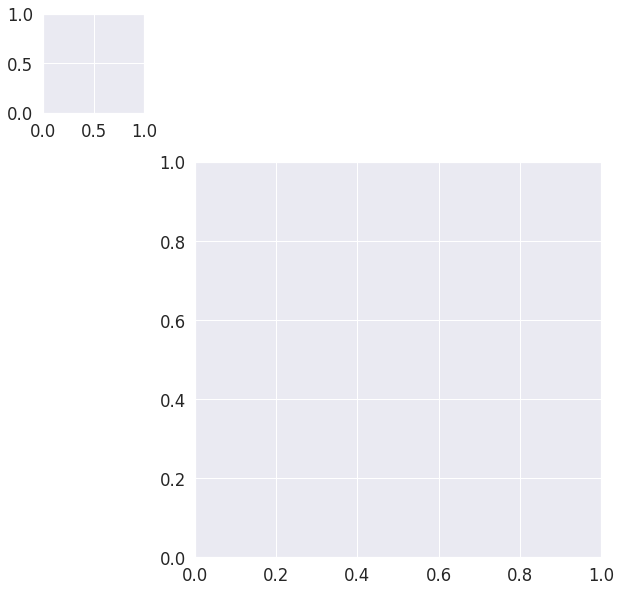

In [ ]:
####
y_train2 = y_train2.astype(int)
y_test2 = y_test2.astype(int)
print(type(y_train2[0]))
print(type(y_test2[0]))
#for with out PCA
X_train2 = X_train2.astype(int)
X_test2 = X_test2.astype(int)
import random
X_train2 = X_train2 + random.uniform(0.001, 0.009)
####

df_train = pd.DataFrame(X_train2)
df_test = pd.DataFrame(X_test2)
import seaborn as sns
sns.clustermap(df_train.corr())
sns.clustermap(df_test.corr())

In [ ]:
# Comment this if PCA used
"""excl = [11,6,4,14,12,15,3]
X_train_drop_corr = scaler.fit_transform(df_train.drop(excl,axis=1))
X_test_drop_corr = scaler.fit_transform(df_test.drop(excl,axis=1))
df = pd.DataFrame(X_train_drop_corr)
df2 = pd.DataFrame(X_test_drop_corr)
sns.clustermap(df.corr())
sns.clustermap(df2.corr())"""

In [ ]:
print(X_train2.shape) #change to <X_train_drop_corr> if f| PCA not used
print(X_test2.shape) #change to <X_test_drop_corr> if f| PCA not used
print(type(X_train2[0][0]))
print(type(X_test2[0][0]))
print(type(y_train2[0]))
print(type(y_test2[0]))

In [ ]:
# Create instance of ELM object with 10 hidden neuron
#input | output | Hidden layer (2, 1, 30)
elm = ELM(X_train.shape[1], 1, 30) #change to <X_train_drop_corr> if f| PCA not used

# Train data
elm.train(X_train,y_train2.reshape(-1,1)) #change to <X_train_drop_corr> if f| PCA not used

# Make prediction from training process
y_pred_train = elm.predict(X_train) #change to <X_train_drop_corr> if f| PCA not used
y_pred_train = (y_pred_train > 0.5).astype(int)
Train_accuracy = round(accuracy_score(y_train2, y_pred_train),2)
print('Train accuracy: ', Train_accuracy*100, "%")

In [ ]:
# Make prediction from testing process
y_pred2 = elm.predict(X_test) #change to <X_test_drop_corr> if f| PCA not used
y_pred2 = (y_pred2 > 0.5).astype(int)

Accuracy = accuracy_score(y_test2, y_pred2)
#print(f'ELM Train Accuracy: {round(accuracy_score(X_train,y_train)*100,2)}%')
print(f'ELM test Accuracy: {round(Accuracy*100,2)}%')

predictions = y_pred2
#kp_elm = round(cohen_kappa_score(y_test, predictions),2)
#print('Kappa score:%.3f' %(kp_elm))
cm = confusion_matrix(y_test2, predictions, labels=clf_mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_mlp.classes_)
disp.plot()

#Print Confusion matrix

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test2, predictions).ravel()
sensitivity = round(tp / (tp + fn),2)
specificity = round(tn / (tn + fp),2)
PPV = round(tp / (tp + fp),2)
NPV = round(tn / (tn + fn),2)
F1 = round(2*((PPV * sensitivity) / (PPV + sensitivity)),2)
Train_accuracy = Train_accuracy
Accuracy = round(Accuracy*100,2)
result_ELM = []
result_ELM.append("ELM")
result_ELM.append(sensitivity)
result_ELM.append(specificity)
result_ELM.append(PPV)
result_ELM.append(NPV)
result_ELM.append(F1)
result_ELM.append(Train_accuracy)
result_ELM.append(Accuracy)
#result_ELM.append(kp_elm)
print("sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu (7), kappa: \n",result_ELM)

In [ ]:
result_matrix = []
result_matrix.append("MLc, sensitivity, specificity, PPV, NPV, F1, Train Accu, Test Accu, kappa-- (9)")
result_matrix.append(result_LR)
result_matrix.append(result_NB)
result_matrix.append(result_DT)
result_matrix.append(result_RF)
#result_matrix.append(result_PAC)
result_matrix.append(result_SVM)
result_matrix.append(result_KNN)
#result_matrix.append(result_SGD)
result_matrix.append(result_GB)
result_matrix.append(result_ADAB)
#result_matrix.append(result_XBOOST)
result_matrix.append(result_MLP)
#result_matrix.append(result_ELM)

In [ ]:
for i in range(0, len(result_matrix)):
  print(result_matrix[i])

#AUC-ROC Curve

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
"""
LogisticReg
NaivBayes
DTc
Pac
"""
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = logreg.predict_proba(X_test)
nb_probs = NB.predict_proba(X_test)
dtc_probs = DTc.predict_proba(X_test)
rf_probs = clf_rf.predict(X_test)
pac_probs = pac.predict(X_test)
svm_probs = clf_svm.predict(X_test)
knn_probs = clf_knn.predict(X_test)
sgd_probs = clf_sgd.predict(X_test)
gb_probs = clf_gb.predict(X_test)
adaB_probs = clf_adaB.predict(X_test)
#xgb_probs = clf_xboost.predict(X_test)
mlp_probs = clf_mlp.predict(X_test)
#elm_probs = elm.predict(X_test2)
#elm_probs = elm.predict(X_test_drop_corr) #avoiding Feature selection & PCA
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
nb_probs = nb_probs[:, 1]
dtc_probs = dtc_probs[:, 1]
rf_probs = rf_probs.astype(np.float)
pac_probs = pac_probs.astype(np.float)
svm_probs = svm_probs.astype(np.float)
knn_probs = knn_probs.astype(np.float)
sgd_probs = sgd_probs.astype(np.float)
gb_probs = gb_probs.astype(np.float)
adaB_probs = adaB_probs.astype(np.int)
#xgb_probs = xgb_probs.astype(np.int)
mlp_probs = mlp_probs.astype(np.int)
#elm_probs = elm_probs.astype(np.int)
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
dtc_auc = roc_auc_score(y_test, dtc_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
pac_auc = roc_auc_score(y_test, pac_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
sgd_auc = roc_auc_score(y_test, knn_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
adaB_auc = roc_auc_score(y_test, adaB_probs)
#xgb_auc = roc_auc_score(y_test, xgb_probs)
mlp_auc = roc_auc_score(y_test, mlp_probs)
#elm_auc = roc_auc_score(y_test, elm_probs)
# summarize scores
print('No Skill: ROC AUC=,%.3f' % (ns_auc))
print('Logistic: ROC AUC=,%.3f' % (lr_auc))
print('NB: ROC AUC=,%.3f' % (nb_auc))
print('*DTC: ROC AUC=,%.3f' % (dtc_auc))
print('*RF: ROC AUC=,%.3f' % (rf_auc))
#print('PAC: ROC AUC=,%.3f' % (pac_auc))
print('*SVM: ROC AUC=,%.3f' % (svm_auc))
print('*KNN: ROC AUC=,%.3f' % (knn_auc))
#print('SGD: ROC AUC=,%.3f' % (sgd_auc))
print('*GB: ROC AUC=,%.3f' % (gb_auc))
print('*ADA-Boost: ROC AUC=,%.3f' % (adaB_auc))
#print('*XGBoost: ROC AUC=,%.3f' % (xgb_auc))
print('MLP: ROC AUC=,%.3f' % (mlp_auc))
#print('*ELM: ROC AUC=,%.3f' % (elm_auc))
# calculate roc curves
y_test2 = y_test.map({'1': 1, '0': 0}).astype(int)
ns_fpr, ns_tpr, _ = roc_curve(y_test2, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test2, lr_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test2, nb_probs)
dtc_fpr, dtc_tpr, _ = roc_curve(y_test2, dtc_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test2, rf_probs)
pac_fpr, pac_tpr, _ = roc_curve(y_test2, pac_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test2, svm_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test2, knn_probs)
sgd_fpr, sgd_tpr, _ = roc_curve(y_test2, sgd_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test2, gb_probs)
adaB_fpr, adaB_tpr, _ = roc_curve(y_test2, adaB_probs)
#xgb_fpr, xgb_tpr, _ = roc_curve(y_test2, xgb_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test2, mlp_probs)
#elm_fpr, elm_tpr, _ = roc_curve(y_test2, elm_probs)

# plot the roc curve for the model
f = pyplot.figure()
f.set_figwidth(15)
f.set_figheight(10)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill= %.2f' % (ns_auc))
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='LR= %.2f' % (lr_auc))
pyplot.plot(nb_fpr, nb_tpr, marker='.', label='NB= %.2f' % (nb_auc))
pyplot.plot(dtc_fpr, dtc_tpr, marker='.', label='DT= %.2f' % (dtc_auc))
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='RF= %.2f' % (rf_auc))
#pyplot.plot(pac_fpr, pac_tpr, marker='.', label='PAC= %.2f' % (pac_auc))
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM= %.2f' % (svm_auc))
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='KNN= %.2f' % (knn_auc))
#pyplot.plot(sgd_fpr, sgd_tpr, marker='.', label='SGD= %.2f' % (sgd_auc))
pyplot.plot(gb_fpr, gb_tpr, marker='.', label='GB= %.2f' % (gb_auc))
pyplot.plot(adaB_fpr, adaB_tpr, marker='.', label='ADAB= %.2f' % (adaB_auc))
#pyplot.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost= %.2f' % (xgb_auc))
pyplot.plot(mlp_fpr, mlp_tpr, marker='.', label='MLP= %.2f' % (mlp_auc))
#pyplot.plot(elm_fpr, elm_tpr, marker='.', label='ELM= %.2f' % (elm_auc))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
#pyplot.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 10})
pyplot.legend(loc='center right', bbox_to_anchor=(1.008, 0.275), prop={'size': 19})
#loc='upper left', bbox_to_anchor=(0, 4), mode="expand", borderaxespad=0.3
# show the plot
pyplot.show()

# CONCATENATE class variables together.

In [ ]:
"""balanced_df = pd.concat([df[df["class"] == 1], df[df["class"] == 0].sample(n = 128, replace = True)], axis = 0)
balanced_df.reset_index(drop=True, inplace=True)
balanced_df["class"].value_counts()"""

In [ ]:
# print(_plot_feature_imp(logreg.coef_[0]))